# Capstone Project: Linear Regression: SGCarMart Used Cars Price Predictor

In [79]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

### Section 1: DataFrame Loading, Cleaning

In [80]:
# Returns you all the variables in the current environment

# dir()  

# Refer to this link: https://stackoverflow.com/questions/633127/viewing-all-defined-variables
# To find out out to view all defined variables in the current environment

In [107]:
df_main = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
df_main.sample(10)

LISTING_URL  \
2643  https://www.sgcarmart.com/used_cars/info.php?I...   
4187  https://www.sgcarmart.com/used_cars/info.php?I...   
1491  https://www.sgcarmart.com/used_cars/info.php?I...   
2246  https://www.sgcarmart.com/used_cars/info.php?I...   
5287  https://www.sgcarmart.com/used_cars/info.php?I...   
4017  https://www.sgcarmart.com/used_cars/info.php?I...   
2210  https://www.sgcarmart.com/used_cars/info.php?I...   
1052  https://www.sgcarmart.com/used_cars/info.php?I...   
1411  https://www.sgcarmart.com/used_cars/info.php?I...   
5891  https://www.sgcarmart.com/used_cars/info.php?I...   

                                                  BRAND     PRICE  \
2643                        Mazda 3 1.5A Deluxe Sunroof   33800.0   
4187                     MINI John Cooper Works GP 2.0A  182588.0   
1491  Mercedes-Benz GLE-Class GLE53 Mild Hybrid AMG ...  325800.0   
2246                          Honda Freed Hybrid 1.5A G   74000.0   
5287                          Toyota Corolla Altis 1.6A   38800.0   
4017                                      MINI One 1.6A   80000.0   
2210                   Mazda 3 Mild Hybrid 1.5A Classic   83800.0   
1052            Citroen C3 Aircross 1.2A PureTech Shine   47777.0   
1411                     Mercedes-Benz E-Class E200 CGI   91200.0   
5891                   Honda Vezel 1.5A G Honda Sensing  145800.0   

      DEPRE_YEARLY   REG_DATE  MILEAGE_KM MANUFACTURED_YEAR  ROAD_TAX_YEARLY  \
2643       13070.0  15-Sep-16     50000.0              2016            682.0   
4187       22620.0   8-Jun-21     27000.0              2020           1210.0   
1491       41160.0  24-Nov-20     86980.0               SUV           2384.0   
2246       16430.0  21-Aug-18     91219.0               MPV            682.0   
5287        9320.0  16-Dec-08    145000.0              2008           1113.0   
4017       10920.0   6-Mar-12     92000.0              2011            965.0   
2210       15180.0  24-Oct-19     95000.0         Mid-Sized            682.0   
1052       10570.0  12-Apr-18         NaN              2018            508.0   
1411       13530.0  16-Sep-11    102000.0              2011           1266.0   
5891       16620.0  13-Apr-23     36288.0              2022            682.0   

     TRANSMISSION  DEREG_VALUE_FROM_SCRAPE_DATE SCRAPE_DATE      OMV      ARF  \
2643         Auto                       19183.0    3/9/2024  19544.0  14544.0   
4187         Auto                       76225.0    3/9/2024  48059.0  59283.0   
1491         2020                      129757.0    3/9/2024      NaN      NaN   
2246         2018                       24762.0    3/9/2024      NaN      NaN   
5287         Auto                       12603.0    3/9/2024  16084.0  16084.0   
4017         Auto                       37062.0    3/9/2024  18996.0  18996.0   
2210         2019                       26125.0    3/9/2024      NaN      NaN   
1052         Auto                       25836.0    3/9/2024  19330.0  19330.0   
1411         Auto                       33521.0    3/9/2024  43285.0  43285.0   
5891         Auto                       68854.0    3/9/2024  20221.0   5310.0   

      COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  \
2643               51506.0             731.0              1496.0   
4187               47806.0            2464.0              1998.0   
1491               40690.0            2250.0              2999.0   
2246               33420.0            1132.0              1496.0   
5287               30284.0            1498.0              1598.0   
4017               50570.0            2653.0              1598.0   
2210               34001.0            1855.0              1496.0   
1052               36810.0            1313.0              1199.0   
1411               49716.0            2438.0              1796.0   
5891               81089.0            3139.0              1496.0   

      CURB_WEIGHT_KG  NO_OF_OWNERS     VEHICLE_TYPE  
2643          1321.0           1.0  Mid-Sized Sedan  
4187

In [82]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_YEARLY', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_YEARLY', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [83]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1) # Dropping columns that I used for my own reference

# We see that we have NA entries in this dataset. 
# We want to drop these NA values or they will pose problems for us later
# The null values can be attributed to the fact that some data is not keyed in the listing itself, 
# or formatting issues due to the varying ways of which people organize the information of the car in a single listing

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 593
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         594 non-null    object 
 1   PRICE                         588 non-null    float64
 2   DEPRE_YEARLY                  584 non-null    float64
 3   REG_DATE                      594 non-null    object 
 4   MILEAGE_KM                    492 non-null    float64
 5   MANUFACTURED_YEAR             594 non-null    object 
 6   ROAD_TAX_YEARLY               585 non-null    float64
 7   TRANSMISSION                  594 non-null    object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  538 non-null    float64
 9   OMV                           506 non-null    float64
 10  ARF                           507 non-null    float64
 11  COE_FROM_SCRAPE_DATE          545 non-null    float64
 12  DAYS_OF_COE_LEFT              593 non-null    float64
 13  ENGINE_CAP

In [84]:
# We now have rows of data after dropping null values

df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 593
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         359 non-null    object 
 1   PRICE                         359 non-null    float64
 2   DEPRE_YEARLY                  359 non-null    float64
 3   REG_DATE                      359 non-null    object 
 4   MILEAGE_KM                    359 non-null    float64
 5   MANUFACTURED_YEAR             359 non-null    object 
 6   ROAD_TAX_YEARLY               359 non-null    float64
 7   TRANSMISSION                  359 non-null    object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  359 non-null    float64
 9   OMV                           359 non-null    float64
 10  ARF                           359 non-null    float64
 11  COE_FROM_SCRAPE_DATE          359 non-null    float64
 12  DAYS_OF_COE_LEFT              359 non-null    float64
 13  ENGINE_CAP

In [108]:
# Taking a look at our data
df_clean.sample(10)

BRAND     PRICE  DEPRE_YEARLY  \
99            Honda Mobilio 1.5A RS i-VTEC Luxe   32900.0       12780.0   
410            Honda Vezel 1.5A X Honda Sensing   79688.0       15050.0   
406                          Honda Vezel 1.5A G  119800.0       15550.0   
137            Mercedes-Benz A-Class A180 Style   48800.0       15250.0   
139                           Honda Fit 1.3A GF   68888.0       12900.0   
4               MG HS 1.5A Turbo Panoramic Roof  109800.0       15320.0   
273                             Mazda 2 HB 1.5A   51800.0       10920.0   
473  Mercedes-Benz GLB-Class GLB180 Progressive  216000.0       21620.0   
213             MG HS 1.5A Turbo Panoramic Roof  106800.0       15790.0   
450                       Volvo S90 T5 Momentum  112888.0       19550.0   

     MILEAGE_KM  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT   REG_DATE  \
99     119413.0               47889.0             641.0 2016-06-30   
410     53000.0               26999.0            1464.0 2019-07-08   
406     25700.0               58801.0            2682.0 2022-01-21   
137    120000.0               48401.0             916.0 2017-03-20   
139     47431.0               34001.0            1858.0 2019-10-17   
4       91000.0               47506.0            2372.0 2021-03-16   
273     93000.0               42275.0            1708.0 2014-07-10   
473     14002.0               95202.0            2950.0 2023-08-24   
213     89000.0               40990.0            2226.0 2020-10-30   
450     99000.0               37620.0            1644.0 2019-03-28   

     MANUFACTURED_YEAR  CAR_AGE  DEREG_VALUE_FROM_SCRAPE_DATE      OMV  \
99                2016      8.0                       19326.0  19298.0   
410               2019      5.0                       22559.0  22531.0   
406               2021      3.0                       50917.0  23572.0   
137               2016      8.0                       24365.0  23657.0   
139               2019      5.0                       21677.0  15689.0   
4                 2020      4.0                       44584.0  19426.0   
273               2014     10.0                       40098.0  12469.0   
473               2023      1.0                      109084.0  37068.0   
213               2020      4.0                       39582.0  19131.0   
450               2019      5.0                       49974.0  39504.0   

         ARF  ENGINE_CAPACITY_CC  ROAD_TAX_YEARLY  CURB_WEIGHT_KG  \
99   19298.0              1497.0            684.0          1160.0   
410  13544.0              1496.0            682.0          1190.0   
406  10001.0              1496.0            682.0          1250.0   
137  20120.0              1595.0            740.0          1395.0   
139   5689.0              1317.0            578.0          1030.0   
4    19426.0              1490.0            680.0          1563.0   
273   7469.0              1498.0            752.0          1046.0   
473  43896.0              1332.0            586.0          1550.0   
213  19131.0              1490.0            680.0          1563.0   
450  47306.0              1969.0           1176.0          1695.0   

     NO_OF_OWNERS  VEHICLE_TYPE  TRANSMISSION  
99            2.0           MPV             1  
410           1.0           SUV             1  
406           1.0           SUV             1  
137           3.0     Hatchback             1  
139           2.0     Hatchback             1  
4             2.0           SUV             1  
273           2.0     Hatchback             1  
473           1.0           SUV             1  
213           2.0           SUV             1  
450           2.0  Luxury Sedan             1

In [86]:
print(df_clean.columns,'\n',len(df_clean.columns))

# We have 17 features in our columns

Index(['BRAND', 'PRICE', 'DEPRE_YEARLY', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_YEARLY', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object') 
 17


### Section 2: Data Categorizing

## Section 2.1: One-hot encoding TRANSMISSION Column

In [87]:
# Here, we see that there only two options for transmission - Auto or Manual (i.e., Auto or not). 
# Therefore, we can do 1-hot encoding for this

df_clean['TRANSMISSION'].value_counts()

TRANSMISSION
Auto      358
Manual      1
Name: count, dtype: int64

In [88]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(30)

BRAND     PRICE  DEPRE_YEARLY  \
210                             Mazda 3 1.5A Sunroof   55800.0       11980.0   
521                   MINI John Cooper Works GP 2.0A  182588.0       22620.0   
220                                 BMW X1 sDrive18i   41800.0       15950.0   
335                               Honda HR-V 1.5A LX   81800.0       14330.0   
68                        Audi Q2 1.0A TFSI S-tronic   86800.0       16000.0   
93                        MINI Cooper Cabriolet 1.5A   68888.0       18030.0   
337                      Opel Crossland 1.2A X Turbo   53800.0       10790.0   
539             Mercedes-Benz E-Class E200 Exclusive  213000.0       25160.0   
477  Citroen Grand C4 SpaceTourer 1.2A PureTech EAT6   75800.0       14450.0   
55                         Toyota Corolla Altis 1.6A   61888.0       12540.0   
487             Mercedes-Benz E-Class E200 Exclusive  172000.0       22650.0   
509        Peugeot 2008 Active Puretech 1.2A Sunroof   44800.0       11900.0   
267                                Honda Fit 1.3A GF   57800.0       14460.0   
92                                  Nissan Note 1.2A   36800.0       11810.0   
146                 Audi A3 Sedan 1.0A TFSI S-tronic   71300.0       15740.0   
549                             BMW 5 Series 523i XL   40000.0       14160.0   
66            Volkswagen Jetta GP 1.4A TSI Trendline   28800.0       10660.0   
186                     Honda City 1.5A RS i-VTEC LX  111988.0       14680.0   
209                                 Toyota Wish 1.8A   68000.0       16660.0   
581                   Mercedes-Benz GLC-Class GLC200  116888.0       23280.0   
34                         Toyota Wish 1.8A Elegance   28888.0       16340.0   
342       Toyota Harrier Turbo 2.0A G Panoramic Roof   97200.0       18730.0   
588    Mercedes-Benz GLB-Class GLB200 Sport 7-Seater  227800.0       23680.0   
417                     Mercedes-Benz SL-Class SL500  220000.0       25400.0   
467                        Hyundai Avante 1.6A GLS S   63988.0       12930.0   
82                             Volvo S90 T5 Momentum   69800.0       20800.0   
83                        Mercedes-Benz E-Class E230   40800.0        9430.0   
71                                 Honda Stream 1.8A   43888.0       10240.0   
90           Mercedes-Benz A-Class Saloon A200 Sport  152588.0       18700.0   
321               BMW 5 Series 523i Highline Sunroof   32500.0       15050.0   

        REG_DATE  MILEAGE_KM MANUFACTURED_YEAR  ROAD_TAX_YEARLY  \
210  21-May-2014     81800.0              2014            750.0   
521  08-Jun-2021     27000.0              2020           1210.0   
220  01-Jun-2016     90000.0              2016            684.0   
335  22-Jul-2019     60631.0              2019            682.0   
68   24-Apr-2019     73000.0              2018            392.0   
93   29-Sep-2017     87800.0              2017            684.0   
337  28-Jun-2018     74300.0              2018            508.0   
539  20-Sep-2021     33000.0              2021           1202.0   
477  28-Feb-2019     81700.0              2018            508.0   
55   11-Aug-2014    150000.0              2014            742.0   
487  31-Aug-2020     42552.0              2019           1202.0   
509  22-Jan-2018     80000.0              2017            508.0   
267  27-Jun-2018     73000.0              2018            578.0   
92   31-Jul-2017     88000.0              2017            508.0   
146  11-May-2018     77900.0              2018            392.0   
549  02-Jul-2007    155229.0              2007           2694.0   
66   22-Jul-2016     99000.0              2015            620.0   
186  26-Aug-2021     36300.0              2021            684.0   
209  27-Feb-2018     83500.0              2017            976.0   
581  03-Aug-2018    101180.0              2018           1202.0   
34   07-Sep-2015    103000.0              2015            976.0   
342  31-Oct-2018    120482.0              2018           1210.0   
588  27-Jun-2023      150

In [89]:
# Performing whitespace stripping prior to dtype manipulation
df_clean['VEHICLE_TYPE'].apply(str.strip)
df_clean['VEHICLE_TYPE'].apply(str.lstrip)

# Inspection of the type of Vehicles
df_clean['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
SUV                102
Luxury Sedan        63
Mid-Sized Sedan     60
Hatchback           51
MPV                 37
Sports Car          36
Stationwagon        10
Name: count, dtype: int64

In [90]:
df_clean.head()

BRAND     PRICE  DEPRE_YEARLY     REG_DATE  \
0           BMW X6 xDrive35i Sunroof  109800.0       30010.0  20-Sep-2016   
1  Mazda 6 Wagon 2.5A Luxury Sunroof   70588.0       14830.0  24-Jul-2018   
3                 Kia Cerato 1.6A LX   57333.0       12080.0  14-Dec-2018   
4    MG HS 1.5A Turbo Panoramic Roof  109800.0       15320.0  16-Mar-2021   
6          Toyota Corolla Altis 1.6A   43800.0       13200.0  28-Mar-2017   

   MILEAGE_KM MANUFACTURED_YEAR  ROAD_TAX_YEARLY  \
0    152000.0              2016           2362.0   
1     56000.0              2018           1786.0   
3     28188.0              2018            238.0   
4     91000.0              2020            680.0   
6    133000.0              2016            742.0   

   DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  COE_FROM_SCRAPE_DATE  \
0                       69974.0  69405.0  96929.0               58201.0   
1                       28889.0  24217.0  25904.0               31000.0   
3                       11528.0  11238.0  11238.0                8556.0   
4                       44584.0  19426.0  19426.0               47506.0   
6                       25004.0  19990.0  19990.0               50789.0   

   DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  \
0             736.0              2979.0          2025.0           3.0   
1            1095.0              2488.0          1529.0           2.0   
3            1550.0              1591.0          1287.0           2.0   
4            2372.0              1490.0          1563.0           2.0   
6             914.0              1598.0          1215.0           2.0   

      VEHICLE_TYPE  TRANSMISSION  
0              SUV             1  
1     Stationwagon             1  
3  Mid-Sized Sedan             1  
4              SUV             1  
6  Mid-Sized Sedan             1

## Section 2.2: Datetime conversion

In [91]:
# Converting reg_date to datetime, and Manufactured year to int

df_clean['REG_DATE'] = pd.to_datetime(df_clean['REG_DATE'])
df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)
df_clean[['REG_DATE','MANUFACTURED_YEAR']].dtypes

REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int32
dtype: object

In [92]:
df_clean.dtypes

BRAND                                   object
PRICE                                  float64
DEPRE_YEARLY                           float64
REG_DATE                        datetime64[ns]
MILEAGE_KM                             float64
MANUFACTURED_YEAR                        int32
ROAD_TAX_YEARLY                        float64
DEREG_VALUE_FROM_SCRAPE_DATE           float64
OMV                                    float64
ARF                                    float64
COE_FROM_SCRAPE_DATE                   float64
DAYS_OF_COE_LEFT                       float64
ENGINE_CAPACITY_CC                     float64
CURB_WEIGHT_KG                         float64
NO_OF_OWNERS                           float64
VEHICLE_TYPE                            object
TRANSMISSION                             int64
dtype: object

In [93]:
# ONLY RUN THIS CELL ONCE!
df_main['SCRAPE_DATE'] = \
pd.to_datetime(df_main['SCRAPE_DATE']).dt.year # Convert scrape date to integer to perform operations on them


In [94]:
df_main['SCRAPE_DATE'] # Checking dtype

0      2024
1      2024
2      2024
3      2024
4      2024
       ... 
589    2024
590    2024
591    2024
592    2024
593    2024
Name: SCRAPE_DATE, Length: 594, dtype: int32

### Section 2.2.1: Adding a Car Age Column

In [95]:
# Converting current scrape date from main dataframe to datetime object using pandas
from datetime import date

# Obtaining number of years from year of manufacture to current year (metric for how new the car is)
df_clean['CAR_AGE'] = df_main['SCRAPE_DATE'] - df_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
df_clean['CAR_AGE'].astype(int)

0       8
1       6
3       6
4       4
6       8
       ..
585     7
587    19
588     4
590     8
593    15
Name: CAR_AGE, Length: 359, dtype: int32

In [96]:
# Rearranging Columns 
df_clean = df_clean[['BRAND', 'PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_clean.head()

BRAND     PRICE  DEPRE_YEARLY  MILEAGE_KM  \
0           BMW X6 xDrive35i Sunroof  109800.0       30010.0    152000.0   
1  Mazda 6 Wagon 2.5A Luxury Sunroof   70588.0       14830.0     56000.0   
3                 Kia Cerato 1.6A LX   57333.0       12080.0     28188.0   
4    MG HS 1.5A Turbo Panoramic Roof  109800.0       15320.0     91000.0   
6          Toyota Corolla Altis 1.6A   43800.0       13200.0    133000.0   

   COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT   REG_DATE  MANUFACTURED_YEAR  \
0               58201.0             736.0 2016-09-20               2016   
1               31000.0            1095.0 2018-07-24               2018   
3                8556.0            1550.0 2018-12-14               2018   
4               47506.0            2372.0 2021-03-16               2020   
6               50789.0             914.0 2017-03-28               2016   

   CAR_AGE  DEREG_VALUE_FROM_SCRAPE_DATE      OMV      ARF  \
0      8.0                       69974.0  69405.0  96929.0   
1      6.0                       28889.0  24217.0  25904.0   
3      6.0                       11528.0  11238.0  11238.0   
4      4.0                       44584.0  19426.0  19426.0   
6      8.0                       25004.0  19990.0  19990.0   

   ENGINE_CAPACITY_CC  ROAD_TAX_YEARLY  CURB_WEIGHT_KG  NO_OF_OWNERS  \
0              2979.0           2362.0          2025.0           3.0   
1              2488.0           1786.0          1529.0           2.0   
3              1591.0            238.0          1287.0           2.0   
4              1490.0            680.0          1563.0           2.0   
6              1598.0            742.0          1215.0           2.0   

      VEHICLE_TYPE  TRANSMISSION  
0              SUV             1  
1     Stationwagon             1  
3  Mid-Sized Sedan             1  
4              SUV             1  
6  Mid-Sized Sedan             1

## Section 2.3: VEHICLE_TYPE To Dummy Variables

In [97]:
# Making Dummy Variables out of Vehicle Types:

x_vehtype_dummy = patsy.dmatrix('VEHICLE_TYPE',data=df_clean,return_type='dataframe')
x_vehtype_dummy.head()

# Do we drop the "Intercept" column?

Intercept  VEHICLE_TYPE[T.Luxury Sedan]  VEHICLE_TYPE[T.MPV]  \
0        1.0                           0.0                  0.0   
1        1.0                           0.0                  0.0   
3        1.0                           0.0                  0.0   
4        1.0                           0.0                  0.0   
6        1.0                           0.0                  0.0   

   VEHICLE_TYPE[T.Mid-Sized Sedan]  VEHICLE_TYPE[T.SUV]  \
0                              0.0                  1.0   
1                              0.0                  0.0   
3                              1.0                  0.0   
4                              0.0                  1.0   
6                              1.0                  0.0   

   VEHICLE_TYPE[T.Sports Car]  VEHICLE_TYPE[T.Stationwagon]  
0                         0.0                           0.0  
1                         0.0                           1.0  
3                         0.0                           0.0  
4                         0.0                           0.0  
6                         0.0                           0.0

In [98]:
df_clean2 = df_clean.join(x_vehtype_dummy)
df_clean2

BRAND     PRICE  DEPRE_YEARLY  \
0                         BMW X6 xDrive35i Sunroof  109800.0       30010.0   
1                Mazda 6 Wagon 2.5A Luxury Sunroof   70588.0       14830.0   
3                               Kia Cerato 1.6A LX   57333.0       12080.0   
4                  MG HS 1.5A Turbo Panoramic Roof  109800.0       15320.0   
6                        Toyota Corolla Altis 1.6A   43800.0       13200.0   
..                                             ...       ...           ...   
585                    Mazda 3 1.5A Deluxe Sunroof   56800.0       14180.0   
587               Volkswagen Beetle 2.0A Cabriolet   31500.0       13080.0   
588  Mercedes-Benz GLB-Class GLB200 Sport 7-Seater  227800.0       23680.0   
590                             Toyota Wish 1.8A X   53800.0       15570.0   
593                           BMW 5 Series 525i XL   45800.0        9830.0   

     MILEAGE_KM  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT   REG_DATE  \
0      152000.0               58201.0             736.0 2016-09-20   
1       56000.0               31000.0            1095.0 2018-07-24   
3       28188.0                8556.0            1550.0 2018-12-14   
4       91000.0               47506.0            2372.0 2021-03-16   
6      133000.0               50789.0             914.0 2017-03-28   
..          ...                   ...               ...        ...   
585    130000.0               41400.0            1219.0 2018-01-08   
587    161000.0               52660.0             857.0 2007-01-31   
588      1500.0              121000.0            3193.0 2023-06-27   
590    118000.0               52000.0            1007.0 2017-06-21   
593    153000.0               35411.0            1677.0 2009-06-25   

     MANUFACTURED_YEAR  CAR_AGE  DEREG_VALUE_FROM_SCRAPE_DATE  ...  \
0                 2016      8.0                       69974.0  ...   
1                 2018      6.0                       28889.0  ...   
3                 2018      6.0                       11528.0  ...   
4                 2020      4.0                       44584.0  ...   
6                 2016      8.0                       25004.0  ...   
..                 ...      ...                           ...  ...   
585               2017      7.0                       26005.0  ...   
587               2005     19.0                       12682.0  ...   
588               2020      4.0                      125319.0  ...   
590               2016      8.0                       26878.0  ...   
593               2009     15.0                       16493.0  ...   

     NO_OF_OWNERS     VEHICLE_TYPE  TRANSMISSION  Intercept  \
0             3.0              SUV             1        1.0   
1             2.0     Stationwagon             1        1.0   
3             2.0  Mid-Sized Sedan             1        1.0   
4             2.0              SUV             1        1.0   
6             2.0  Mid-Sized Sedan             1        1.0   
..            ...              ...           ...        ...   
585           1.0  Mid-Sized Sedan             1        1.0   
587           3.0       Sports Car             1        1.0   
588           1.0              SUV             1        1.0   
590           1.0              MPV             1        1.0   
593           5.0     Luxury Sedan             1        1.0   

     VEHICLE_TYPE[T.Luxury Sedan]  VEHICLE_TYPE[T.MPV]  \
0                             0.0                  0.0   
1                             0.0                  0.0   
3                             0.0                  0.0   
4                             0.0                  0.0   
6                             0.0                  0.0   
..                            ...                  ...   
585                           0.0                  0.0   
587                           0.0                  0.0   
588                           0.0                  0.0   
590                           0.0                  1.0   
593                           1

## Section 2.4: Car Brand Categorization. Includes:
* Splitting them into Dummy Variables
* Indexing them into price range categories (perhaps better metric over vehicle types)
* Converting lesser-known brands into "others"

In [99]:
# Renaming Brand Names to their actual names

df_clean2.loc[df_clean2['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
df_clean2.loc[df_clean2['BRAND'] == 'Land','BRAND'] = 'Land Rover'
df_clean2.loc[df_clean2['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'

In [100]:
# Cleaning whitespaces from the values in "Brand" to prevent any messup later
df_clean2['BRAND'].apply(str.strip)

# Checking the number of brands in the dataset
print("# Of rows in DataFrame in Brands Column:\n", df_clean2.loc[:,'BRAND'])
print("\nValue Counts of Brands:\n", df_clean2.loc[:,'BRAND'].value_counts())
print("\n# of Brands:", len(df_clean2.loc[:,'BRAND'].value_counts()))

# New Column ATAS
# New Column Budget Cars
# Top 20 brands
# Am I comfortable with grouping uncommon cars into others?

# Of rows in DataFrame in Brands Column:
 0                           BMW X6 xDrive35i Sunroof
1                  Mazda 6 Wagon 2.5A Luxury Sunroof
3                                 Kia Cerato 1.6A LX
4                    MG HS 1.5A Turbo Panoramic Roof
6                          Toyota Corolla Altis 1.6A
                           ...                      
585                      Mazda 3 1.5A Deluxe Sunroof
587                 Volkswagen Beetle 2.0A Cabriolet
588    Mercedes-Benz GLB-Class GLB200 Sport 7-Seater
590                               Toyota Wish 1.8A X
593                             BMW 5 Series 525i XL
Name: BRAND, Length: 359, dtype: object

Value Counts of Brands:
 BRAND
Toyota Wish 1.8A                    6
Toyota Corolla Altis 1.6A           6
Subaru Forester 2.0i-L Sunroof      5
Honda Fit 1.3A GF                   5
Nissan Note 1.2A                    5
                                   ..
BMW X1 sDrive18i M-Sport            1
Volkswagen Golf 1.4A TSI Sunroof    1

## Section 3: Data Visualization
* EDA  
* Correlation Matrix  
* Pairplots  

## Section 3.1: Preliminary Correlation Exploration

### Section 3.1.1: Analysis without Car Brands and Vehicle Types for Feature Dropping

In [101]:
df_clean2.columns

Index(['BRAND', 'PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'ENGINE_CAPACITY_CC',
       'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE',
       'TRANSMISSION', 'Intercept', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]'],
      dtype='object')

In [102]:
df_price_no_brands = df_clean2[['PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_price_no_brands.sample(30)

PRICE  DEPRE_YEARLY  MILEAGE_KM  COE_FROM_SCRAPE_DATE  \
135   93800.0       11000.0    133200.0               85845.0   
579   37800.0       15360.0    108298.0               51010.0   
302  152800.0       16840.0     19948.0               87889.0   
534  228800.0       25680.0     31000.0              112001.0   
508   62800.0       14600.0     83313.0               33900.0   
126   80800.0       16240.0     89000.0               32302.0   
325   25800.0       17590.0    136000.0               68589.0   
454   77800.0       13580.0     97309.0               33568.0   
494   68800.0       14960.0     58000.0               27545.0   
246  110800.0       24430.0     89000.0               33900.0   
260   40800.0       11080.0     51000.0               30112.0   
25   124888.0       15480.0     14000.0               68501.0   
326  108800.0       19740.0     74254.0               32200.0   
259  242800.0       27950.0     30000.0               56100.0   
180    1300.0      120880.0       200.0              110000.0   
459   68800.0       18380.0    133089.0               42900.0   
26    22800.0       12440.0    119863.0               43000.0   
332   38000.0       11790.0    104174.0               44002.0   
232   27688.0       13720.0    141185.0               60001.0   
182   64788.0       16080.0     69700.0               42661.0   
475   39800.0       16510.0     74580.0               51506.0   
588  227800.0       23680.0      1500.0              121000.0   
163   65800.0        8780.0    131000.0               56670.0   
269   56800.0       13810.0     67160.0               36810.0   
115  798888.0       95350.0      5588.0              108106.0   
81    57800.0       12540.0    116000.0               25000.0   
559   40888.0       14840.0    141000.0               56889.0   
322   86800.0       19960.0    102000.0               37010.0   
360   95500.0       18360.0     79398.0               31302.0   
451   97800.0       14530.0     66000.0               44589.0   

     DAYS_OF_COE_LEFT   REG_DATE  MANUFACTURED_YEAR  CAR_AGE  \
135            3100.0 2013-03-14               2012     12.0   
579             638.0 2016-06-27               2016      8.0   
302            2592.0 2022-08-31               2022      2.0   
534            2586.0 2022-08-25               2021      3.0   
508            1098.0 2018-07-07               2018      6.0   
126            1523.0 2018-11-17               2018      6.0   
325             279.0 2015-07-03               2015      9.0   
454            2068.0 2010-05-27               2010     14.0   
494            1134.0 2018-08-13               2018      6.0   
246            1367.0 2018-06-26               2018      6.0   
260            1161.0 2017-11-20               2017      7.0   
25             2563.0 2022-07-22               2022      2.0   
326            1581.0 2019-01-15               2018      6.0   
259            2592.0 2021-10-11               2021      3.0   
180            3100.0 2023-03-24               2022      2.0   
459            1095.0 2017-09-04               2017      7.0   
26              521.0 2016-03-02               2015      9.0   
332             737.0 2017-07-31               2016      8.0   
232             370.0 2015-09-29               2015      9.0   
182            1222.0 2018-01-31               2017      7.0   
475             733.0 2016-09-27               2016      8.0   
588            3193.0 2023-06-27               2020      4.0   
163            2711.0 2012-03-30               2011     13.0   
269            1277.0 2018-03-26               2017      7.0   
115            3044.0 2013-01-18               2012     12.0   
81             1132.0 2018-08-21               2018      6.0   
559             760.0 2016-10-04               2016      8.0   
322            1307.0 2018-04-26               2018      6.0   
360            1492.0 2018-10-26               2018      6.0   
451            2372.0 2021-03-26               2021      3.0   

     DE

In [103]:
# Corr Matrix
df_price_no_brands['VEHICLE_TYPE'] =  df_price_no_brands['VEHICLE_TYPE'].map({'SUV': 1, 'Hatchback': 2, 'Mid-Sized Sedan': 3, 'Luxury Sedan': 4, 'Sports Car': 5, 'MPV': 6, 'Stationwagon': 7})
df_price_no_brands.corr()

C:\Users\eugen\AppData\Local\Temp\ipykernel_37572\629942209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_no_brands['VEHICLE_TYPE'] =  df_price_no_brands['VEHICLE_TYPE'].map({'SUV': 1, 'Hatchback': 2, 'Mid-Sized Sedan': 3, 'Luxury Sedan': 4, 'Sports Car': 5, 'MPV': 6, 'Stationwagon': 7})


PRICE  DEPRE_YEARLY  MILEAGE_KM  \
PRICE                         1.000000      0.510666   -0.443871   
DEPRE_YEARLY                  0.510666      1.000000   -0.237268   
MILEAGE_KM                   -0.443871     -0.237268    1.000000   
COE_FROM_SCRAPE_DATE          0.440669      0.408264   -0.245292   
DAYS_OF_COE_LEFT              0.565983      0.153430   -0.455620   
REG_DATE                      0.327926      0.176377   -0.734288   
MANUFACTURED_YEAR             0.298894      0.170273   -0.724760   
CAR_AGE                      -0.298894     -0.170273    0.724760   
DEREG_VALUE_FROM_SCRAPE_DATE  0.609951      0.633417   -0.443637   
OMV                           0.599171      0.747935   -0.189214   
ARF                           0.483911      0.819429   -0.200303   
ENGINE_CAPACITY_CC            0.593101      0.630280   -0.038050   
ROAD_TAX_YEARLY               0.560025      0.553896    0.018501   
CURB_WEIGHT_KG                0.454428      0.479444    0.022253   
NO_OF_OWNERS                 -0.110215     -0.094416    0.483137   
VEHICLE_TYPE                  0.063276      0.055673    0.075792   
TRANSMISSION                  0.048800      0.025769   -0.100073   

                              COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
PRICE                                     0.440669          0.565983   
DEPRE_YEARLY                              0.408264          0.153430   
MILEAGE_KM                               -0.245292         -0.455620   
COE_FROM_SCRAPE_DATE                      1.000000          0.297127   
DAYS_OF_COE_LEFT                          0.297127          1.000000   
REG_DATE                                  0.187611          0.365884   
MANUFACTURED_YEAR                         0.166237          0.338124   
CAR_AGE                                  -0.166237         -0.338124   
DEREG_VALUE_FROM_SCRAPE_DATE              0.569072          0.511387   
OMV                                       0.422657          0.296416   
ARF                                       0.410133          0.264583   
ENGINE_CAPACITY_CC                        0.361555          0.186014   
ROAD_TAX_YEARLY                           0.318953          0.229719   
CURB_WEIGHT_KG                            0.261317          0.131989   
NO_OF_OWNERS                             -0.127907         -0.025687   
VEHICLE_TYPE                              0.078115          0.015025   
TRANSMISSION                              0.086905          0.074811   

                              REG_DATE  MANUFACTURED_YEAR   CAR_AGE  \
PRICE                         0.327926           0.298894 -0.298894   
DEPRE_YEARLY                  0.176377           0.170273 -0.170273   
MILEAGE_KM                   -0.734288          -0.724760  0.724760   
COE_FROM_SCRAPE_DATE          0.187611           0.166237 -0.166237   
DAYS_OF_COE_LEFT              0.365884           0.338124 -0.338124   
REG_DATE                      1.000000           0.989121 -0.989121   
MANUFACTURED_YEAR             0.989121           1.000000 -1.000000   
CAR_AGE                      -0.989121          -1.000000  1.000000   
DEREG_VALUE_FROM_SCRAPE_DATE  0.431755           0.411491 -0.411491   
OMV                          -0.012699          -0.019642  0.019642   
ARF                           0.061254           0.055461 -0.055461   
ENGINE_CAPACITY_CC           -0.145934          -0.161399  0.161399   
ROAD_TAX_YEARLY              -0.263740          -0.279259  0.279259   
CURB_WEIGHT_KG               -0.018517          -0.028861  0.028861   
NO_OF_OWNERS                 -0.568148          -0.578811  0.578811   
VEHICLE_TYPE                 -0.194628          -0.210632  0.210632   
TRANSMISSION                  0.100820           0.099181 -0.099181   

                              DEREG_VALUE_FROM_SCRAPE_DATE       OMV  \
PRICE                                             0.609951  0.599171   
DEPRE_YEARLY                                      0.633417  0.747935   
MILEAGE_KM      

In [104]:
# How each feature relates to price
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
DEREG_VALUE_FROM_SCRAPE_DATE    0.609951
OMV                             0.599171
ENGINE_CAPACITY_CC              0.593101
DAYS_OF_COE_LEFT                0.565983
ROAD_TAX_YEARLY                 0.560025
DEPRE_YEARLY                    0.510666
ARF                             0.483911
CURB_WEIGHT_KG                  0.454428
COE_FROM_SCRAPE_DATE            0.440669
REG_DATE                        0.327926
MANUFACTURED_YEAR               0.298894
VEHICLE_TYPE                    0.063276
TRANSMISSION                    0.048800
NO_OF_OWNERS                   -0.110215
CAR_AGE                        -0.298894
MILEAGE_KM                     -0.443871
Name: PRICE, dtype: float64

(17.5, -0.5)

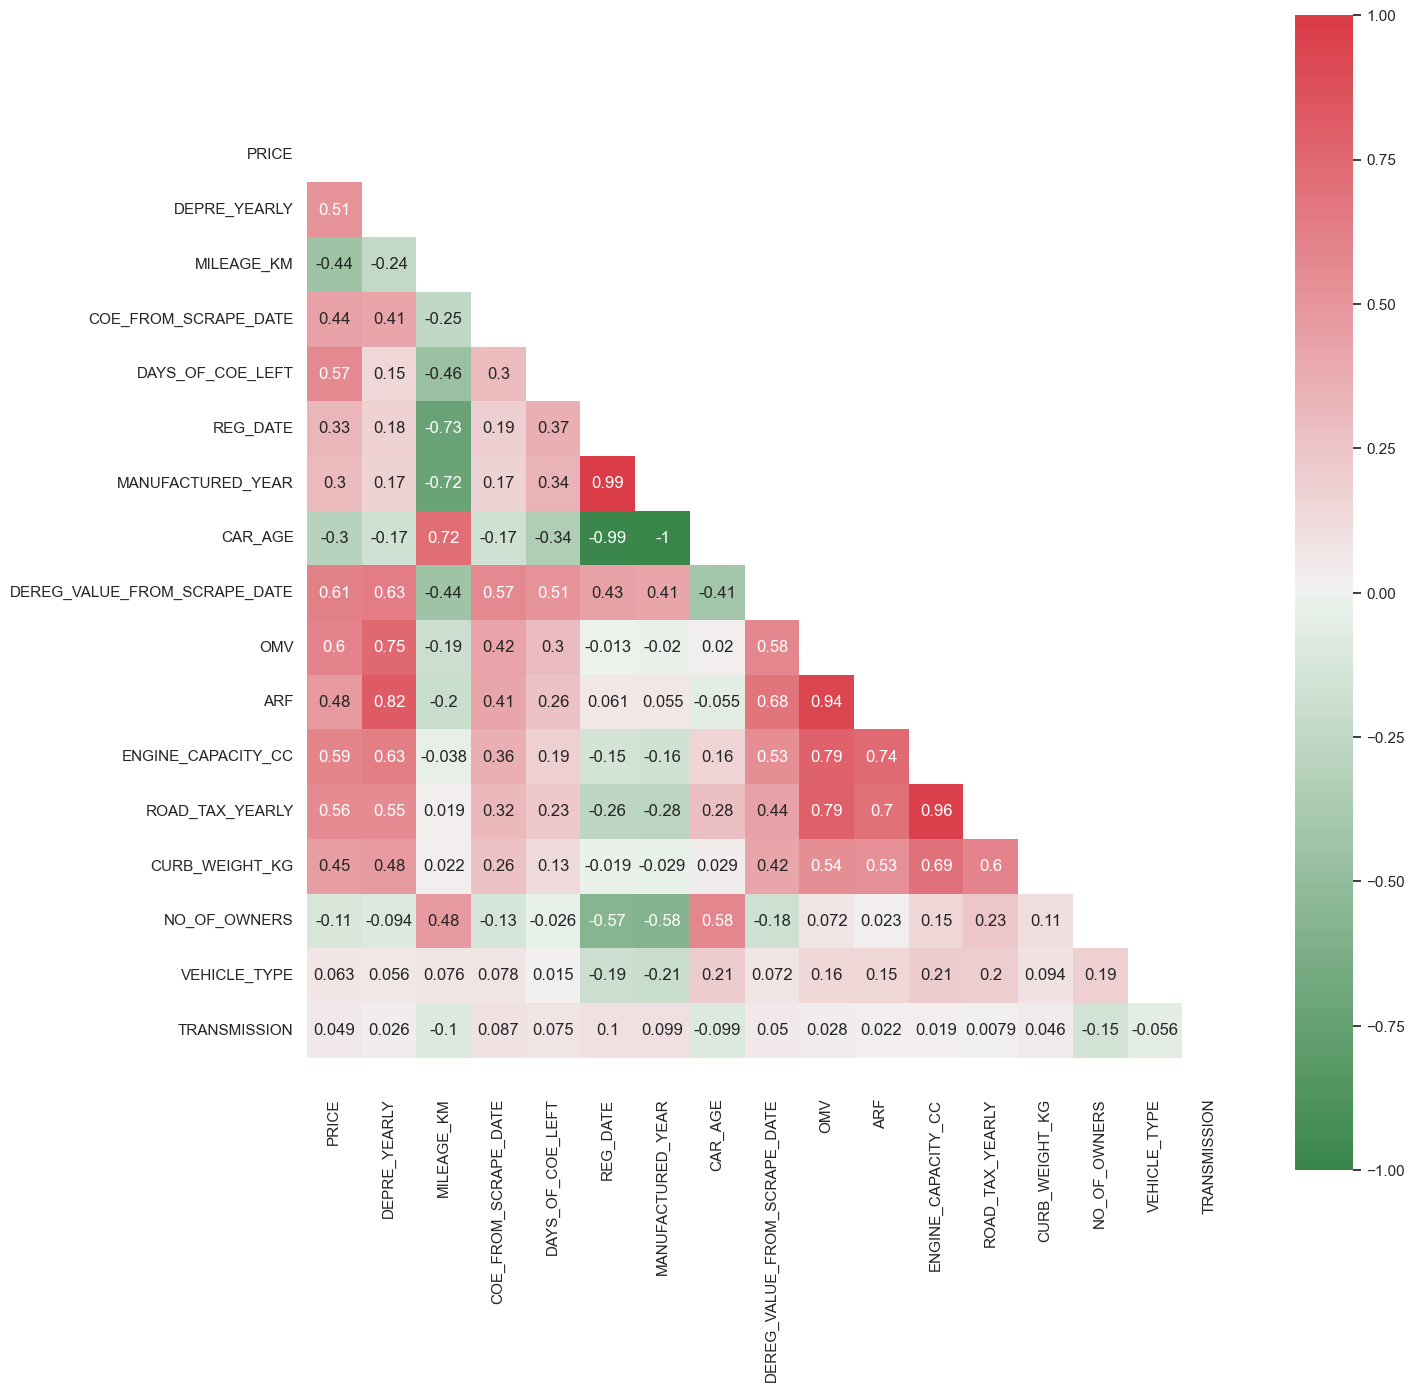

In [105]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_price_no_brands.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(df_price_no_brands.corr(), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### From the above Corr Matrix, we can observe that a few Independent Variables are highly correlated with each other. 
Interestingly, this makes sense due to how a few of the independent variables are calculated. Therefore, some of these features can be dropped.  
1. **OMV and ARF:** 
The Additional Registration Fee (ARF) is a tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle. From the correlation matrix, they have a correlation of **0.96.** Therefore, we can just keep one of this. Therefore, **ARF** will be dropped.
   
   
2. **Engine CC and Road Tax:** 
Road tax increases as engine CC increases. Therefore, having Road Tax in it would be introducing multicolinearity into the model, since both explain the same thing anyway. From the correlation matrix, they have a correlation of **0.97**. Therefore, **road tax** column will be dropped.
   
   
3. **Manufactured Year and Car Age:** 
Obviously, manufactured year can be dropped, since Car Age is derived from year of manufacture. And since car age is more intuitive, **Manufactured Year** column will be dropped.  From the correlation matrix, they have a correlation of **-1**. 
  

  
4. **Dereg Value:**  
The deregistration value of a vehicle is amount one will get back from the government upon deregistering the vehicle for use in Singapore. It is the sum of the COE rebate and the PARF rebate.
The COE rebate is a percentage of the original COE value.
The PARF rebate is a percentage of the original OMV (Open Market Value).
Therefore, the **dereg value will be dropped**. From the corr matrix, OMV and dereg value have a correlation of **0.91.**
  
  
5. **Depreciation:** 
Annual depreciation is the amount the owner loses on the value of the vehicle per year based on the assumption that the vehicle is deregistered only at the end of its 10-yr COE life-span. The value of the car body has not been taken into account.  The formula used to derive the figure is as follows:  
Depreciation = (List Price - Minimum PARF value) ÷ remaining years of COE  
The minimum Preferential Additional Registration Fee (PARF) value is a sum of money that the vehicle owner gets for deregistering his vehicle at the end of its 10-yr COE. It is a function of the Open Market Value (OMV) or Additional Registration Fee (ARF). Commercial vehicles and cars with renewed COE have no minimum PARF value.  Depreciation and OMV have a correlation of **0.91**. **Depreciation** will be dropped.


### Section 3.1.2: Removing Independent Variables with High Correlation to each other

In [106]:
df_price_no_brands.drop(['DEPRE_VALUE_PER_YEAR','REG_DATE','MANUFACTURED_YEAR','DEREG_VALUE_FROM_SCRAPE_DATE',
                         'ARF','ROAD_TAX_PER_YEAR','VEHICLE_TYPE'],axis=1,inplace=True)
df_price_no_brands.columns

KeyError: "['DEPRE_VALUE_PER_YEAR', 'ROAD_TAX_PER_YEAR'] not found in axis"

### Section 3.1.3: Re-Visualizing New Correlation Matrix (with a few features dropped)

(10.5, -0.5)

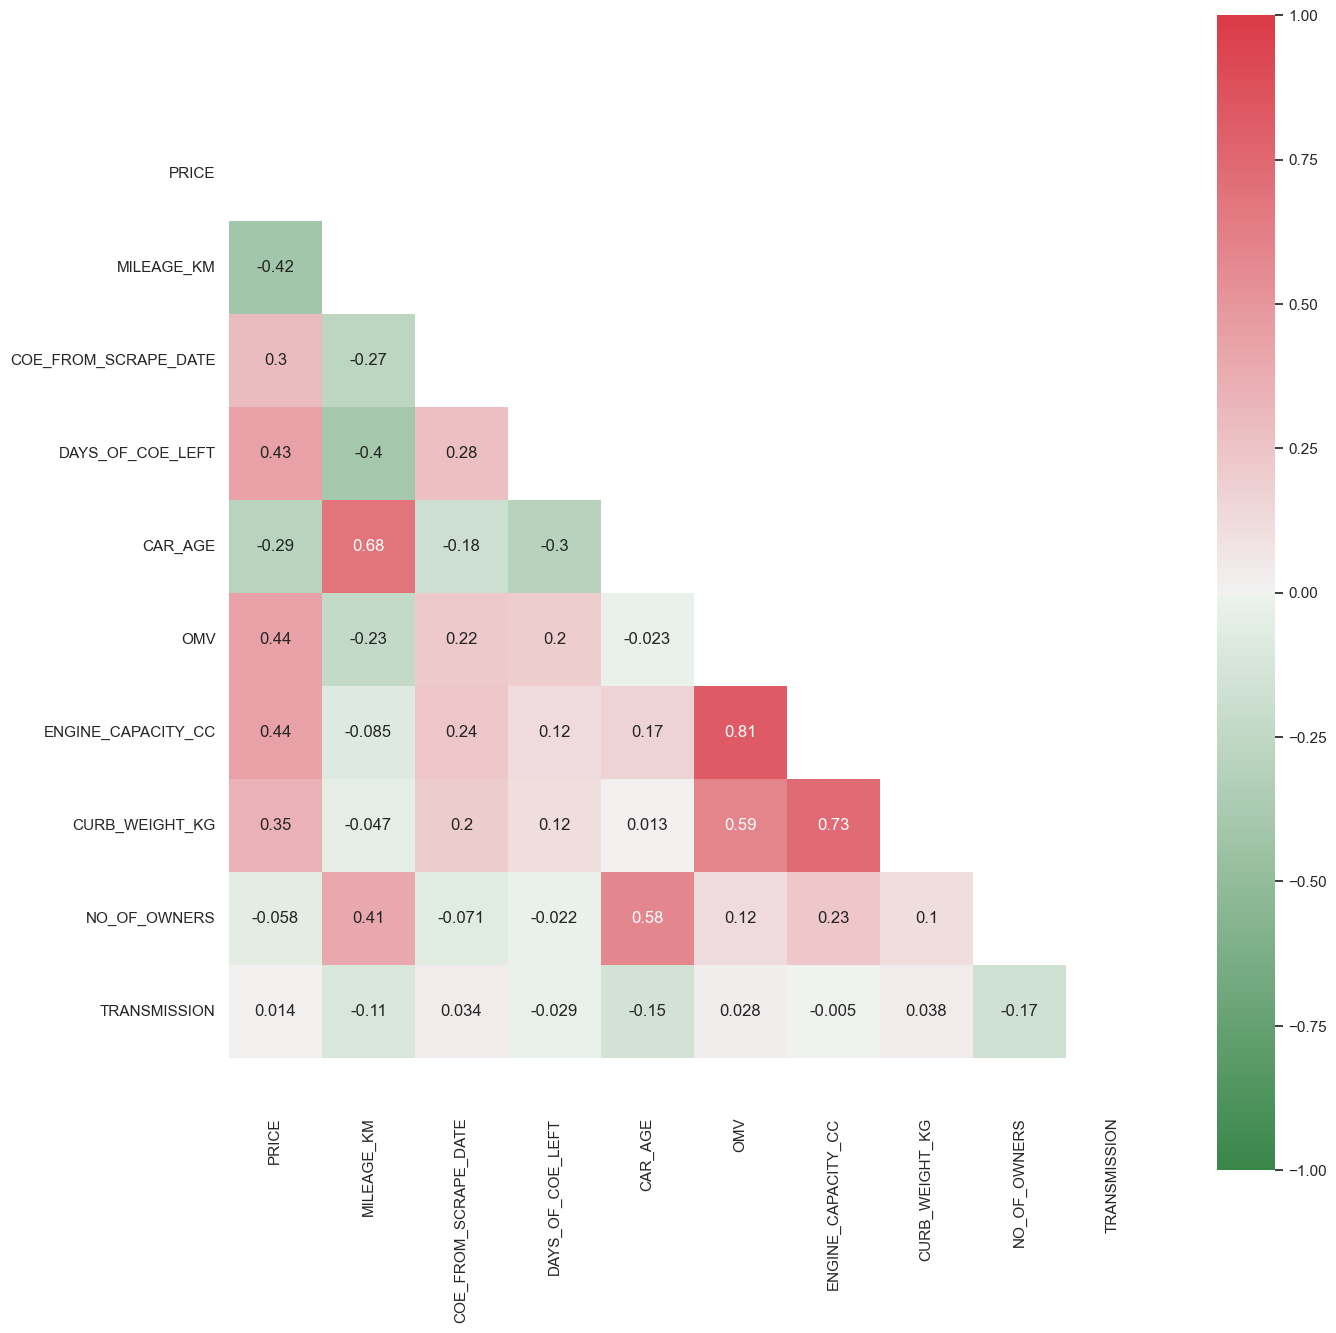

In [ ]:
# Re-visualizing the correlation matrix

sns.set(style="white")

# Creating the data
data = df_price_no_brands.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# Correlations of the independent variables (features) to dependent variable (target, price)
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                   1.000000
ENGINE_CAPACITY_CC      0.440666
OMV                     0.435042
DAYS_OF_COE_LEFT        0.434761
CURB_WEIGHT_KG          0.349065
COE_FROM_SCRAPE_DATE    0.295866
TRANSMISSION            0.013674
NO_OF_OWNERS           -0.057548
CAR_AGE                -0.290454
MILEAGE_KM             -0.419226
Name: PRICE, dtype: float64

#### Section 3.1.3.1: Pairplot after Feature Selection

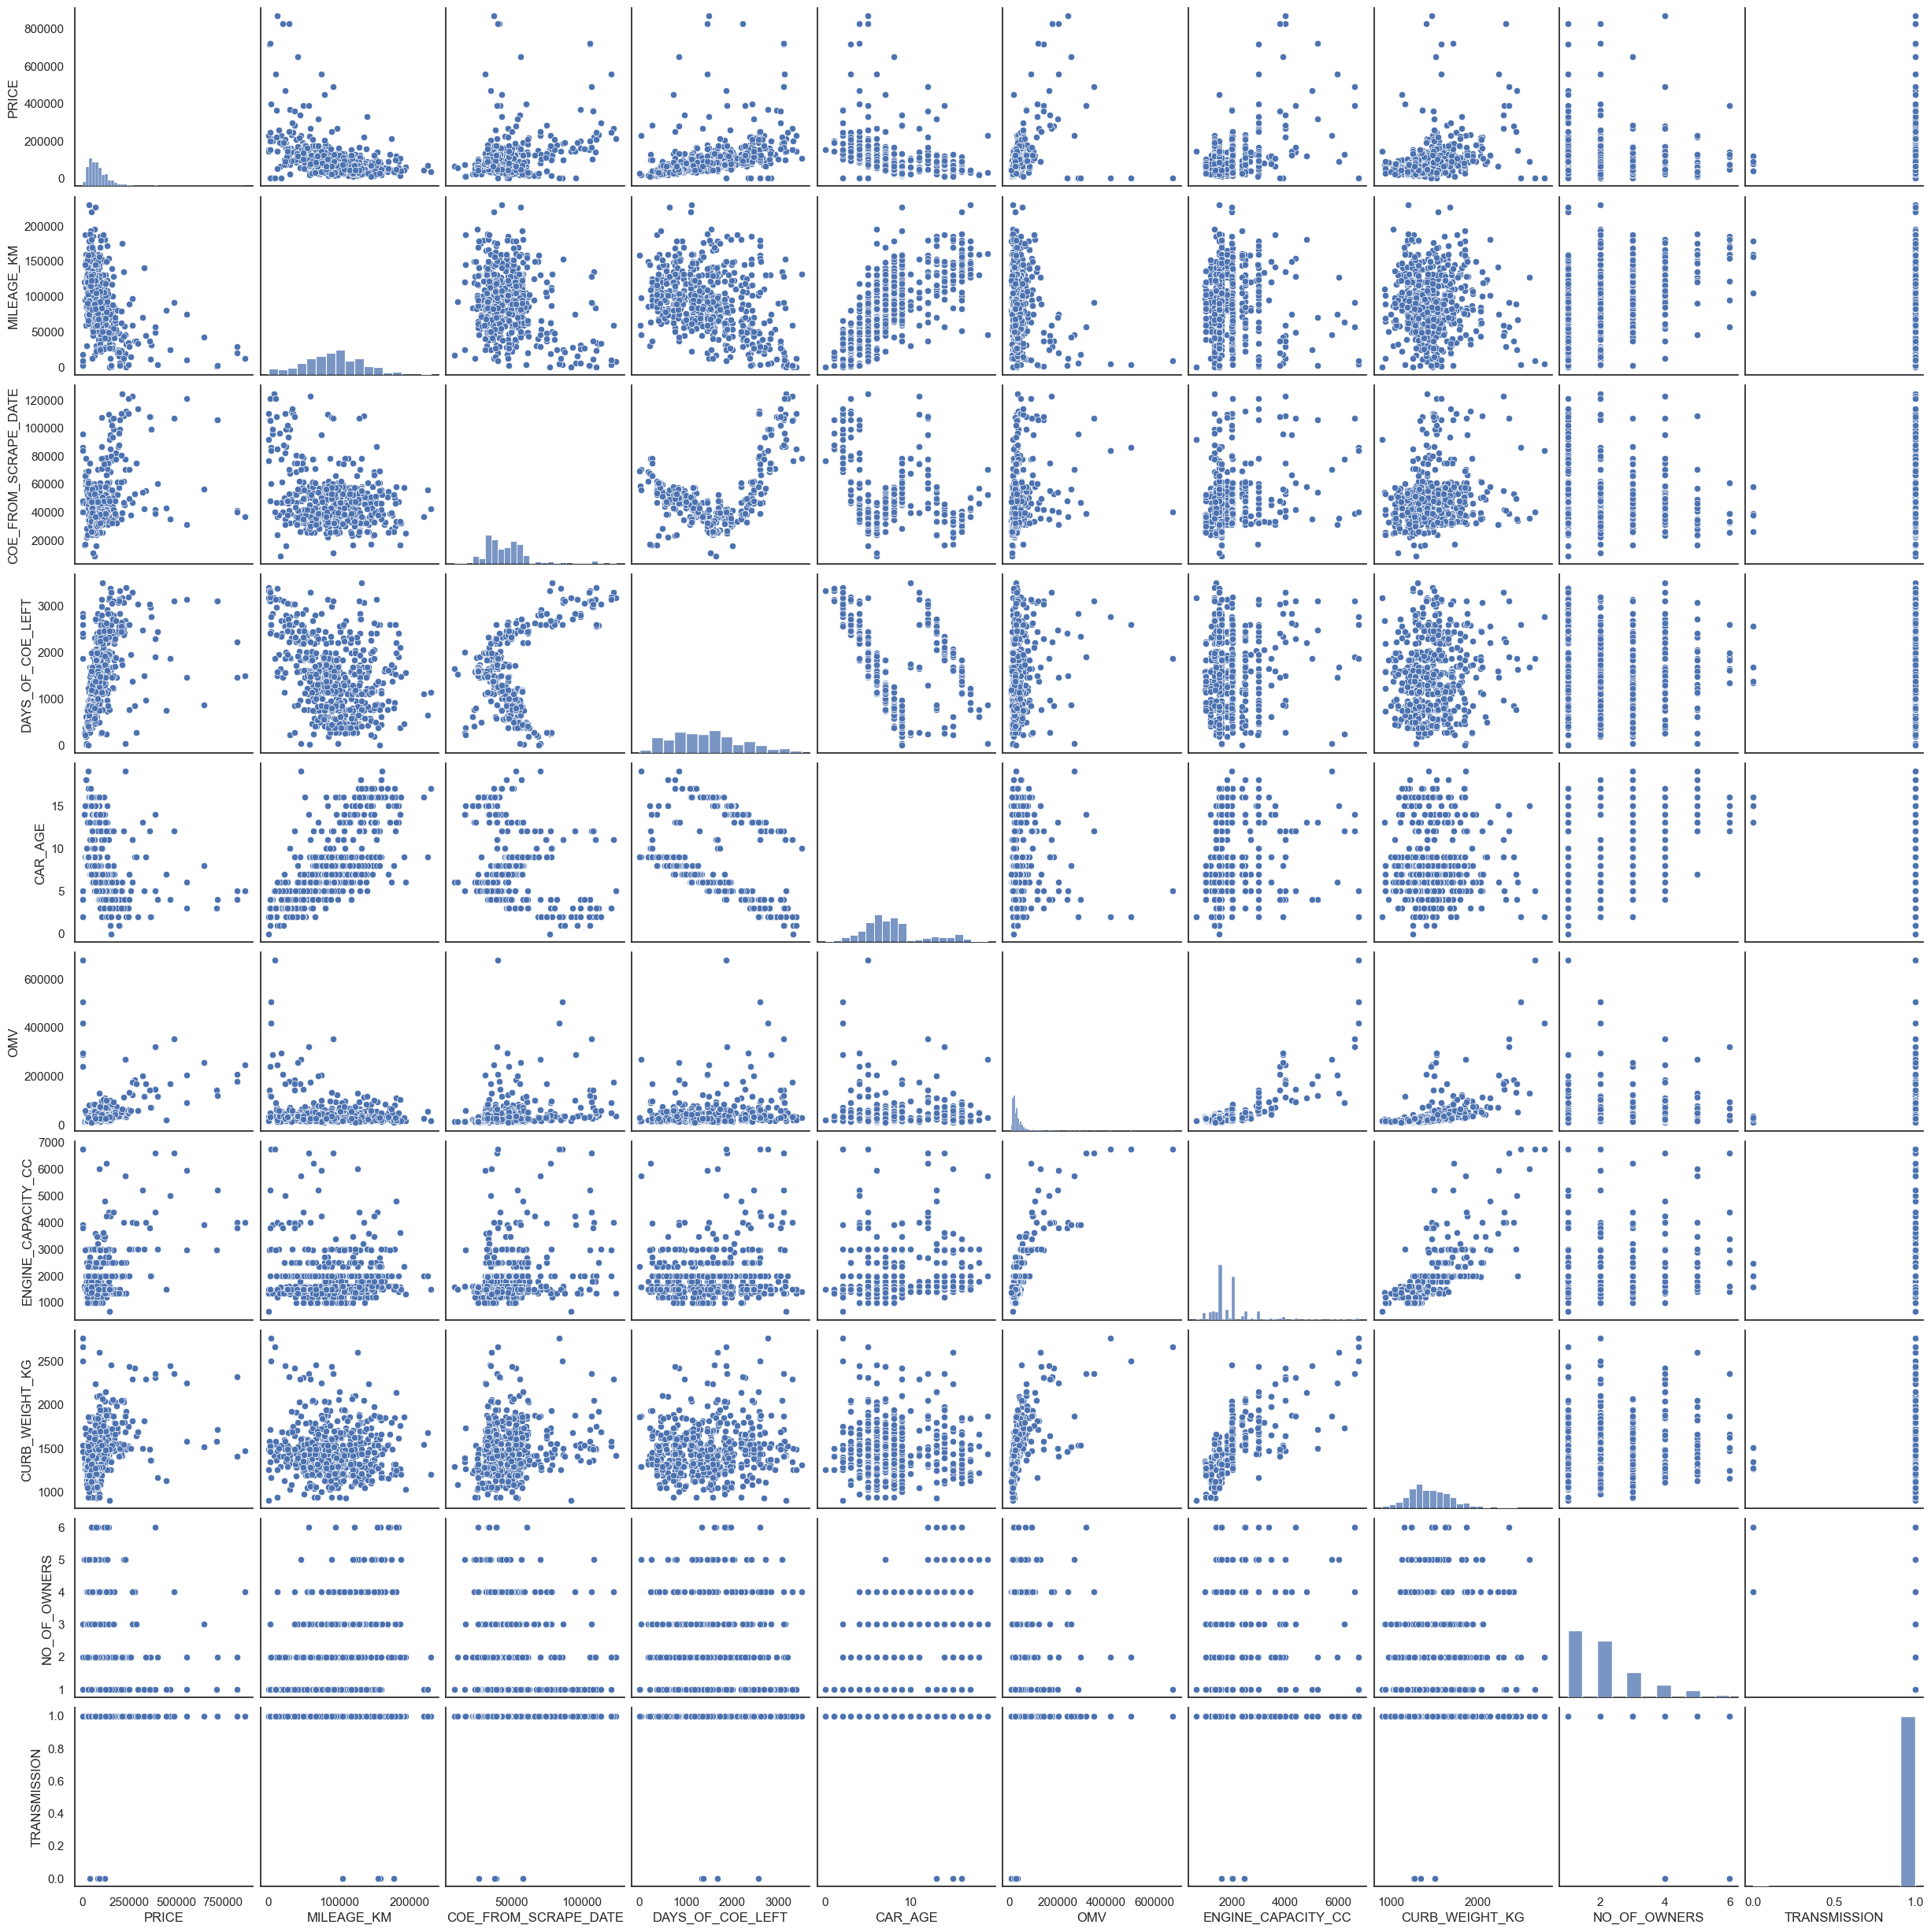

In [ ]:
# Performing a pairplot to visualize the data trends of the variables

# We can see that price and mileage hold a negative linear relationship
# COE from the scrape date doesn't seem to have a very clear relatonship here
# Days of COE seems to have a slight linear r/s
# Car age doesn't seem to have a very distinct relationship here. But generally, the younger the car, the higher the price
# OMV has a clear increasing linear rs with price with price
# Engine capacity seems to also have a increasing linear r/s  with price, with a few outliers in the center
# Perhaps it's because a lot of the higher-priced cars (higher brands) are produced in that engine capacity range?
# Curb weight seems to have a linear r/s too.

sns.pairplot(df_price_no_brands);

In [ ]:
df_price_no_brands.columns

Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

### Section 3.2: Preliminary Model fitting to check R^2 Value and P>|t| values of Price and the leftover Independent Variables

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_price_no_brands[ ['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_price_no_brands['PRICE'].astype(float)



C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
X.head()

const  MILEAGE_KM  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  CAR_AGE  \
3    1.0    140800.0               75889.0             761.0      8.0   
4    1.0    117000.0               39563.0            3503.0     10.0   
5    1.0    126000.0               41006.0               8.0      9.0   
7    1.0     41000.0               78810.0            1610.0      6.0   
9    1.0     57784.0               61103.0            2221.0      4.0   

       OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  TRANSMISSION  
3  71379.0              2995.0          2250.0           3.0           1.0  
4  23465.0              1797.0          1350.0           2.0           1.0  
5  56154.0              1796.0          1650.0           4.0           1.0  
7  32459.0              1598.0          1405.0           2.0           1.0  
9  29913.0              1395.0          1480.0           2.0           1.0

In [ ]:
y.head()

3    70800.0
4    65800.0
5    45000.0
7    70800.0
9    89500.0
Name: PRICE, dtype: float64

In [ ]:
# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:22:48   Log-Likelihood:                -30542.
No. Observations:                2584   AIC:                         6.110e+04
Df Residuals:                    2574   BIC:                         6.116e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.484e+04   8210.482      4.244      0.000    1.87e+04    5.09e+04
MILEAGE_KM               0.0137      0.029      0.474      0.636      -0.043       0.070
COE_FROM_SCRAPE_DATE    -0.5149      0.050    -10.225      0.000      -0.614      -0.416
DAYS_OF_COE_LEFT        13.5465      1.117     12.129      0.000      11.357      15.737
CAR_AGE              -6613.2165    441.423    -14.982      0.000   -7478.797   -5747.636
OMV                      1.6947      0.030     55.901      0.000       1.635       1.754
ENGINE_CAPACITY_CC       3.7436      1.944      1.926      0.054      -0.068       7.556
CURB_WEIGHT_KG          38.2517      3.685     10.381      0.000      31.026      45.477
NO_OF_OWNERS         -5312.6178    941.160     -5.645      0.000   -7158.125   -3467.110
TRANSMISSION          -2.83e+04   5624.584     -5.031      0.000   -3.93e+04   -1.73e+04
==============================================================================
Omnibus:                     2049.653   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458170.330
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      67.988   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Section 3.2.1: Optimizing R^2 Value

#### Section 3.2.1.1: Checking Distributions & Pairplots of all Variables

##### Pairplot of Price vs Independent Variables (without any transformation)

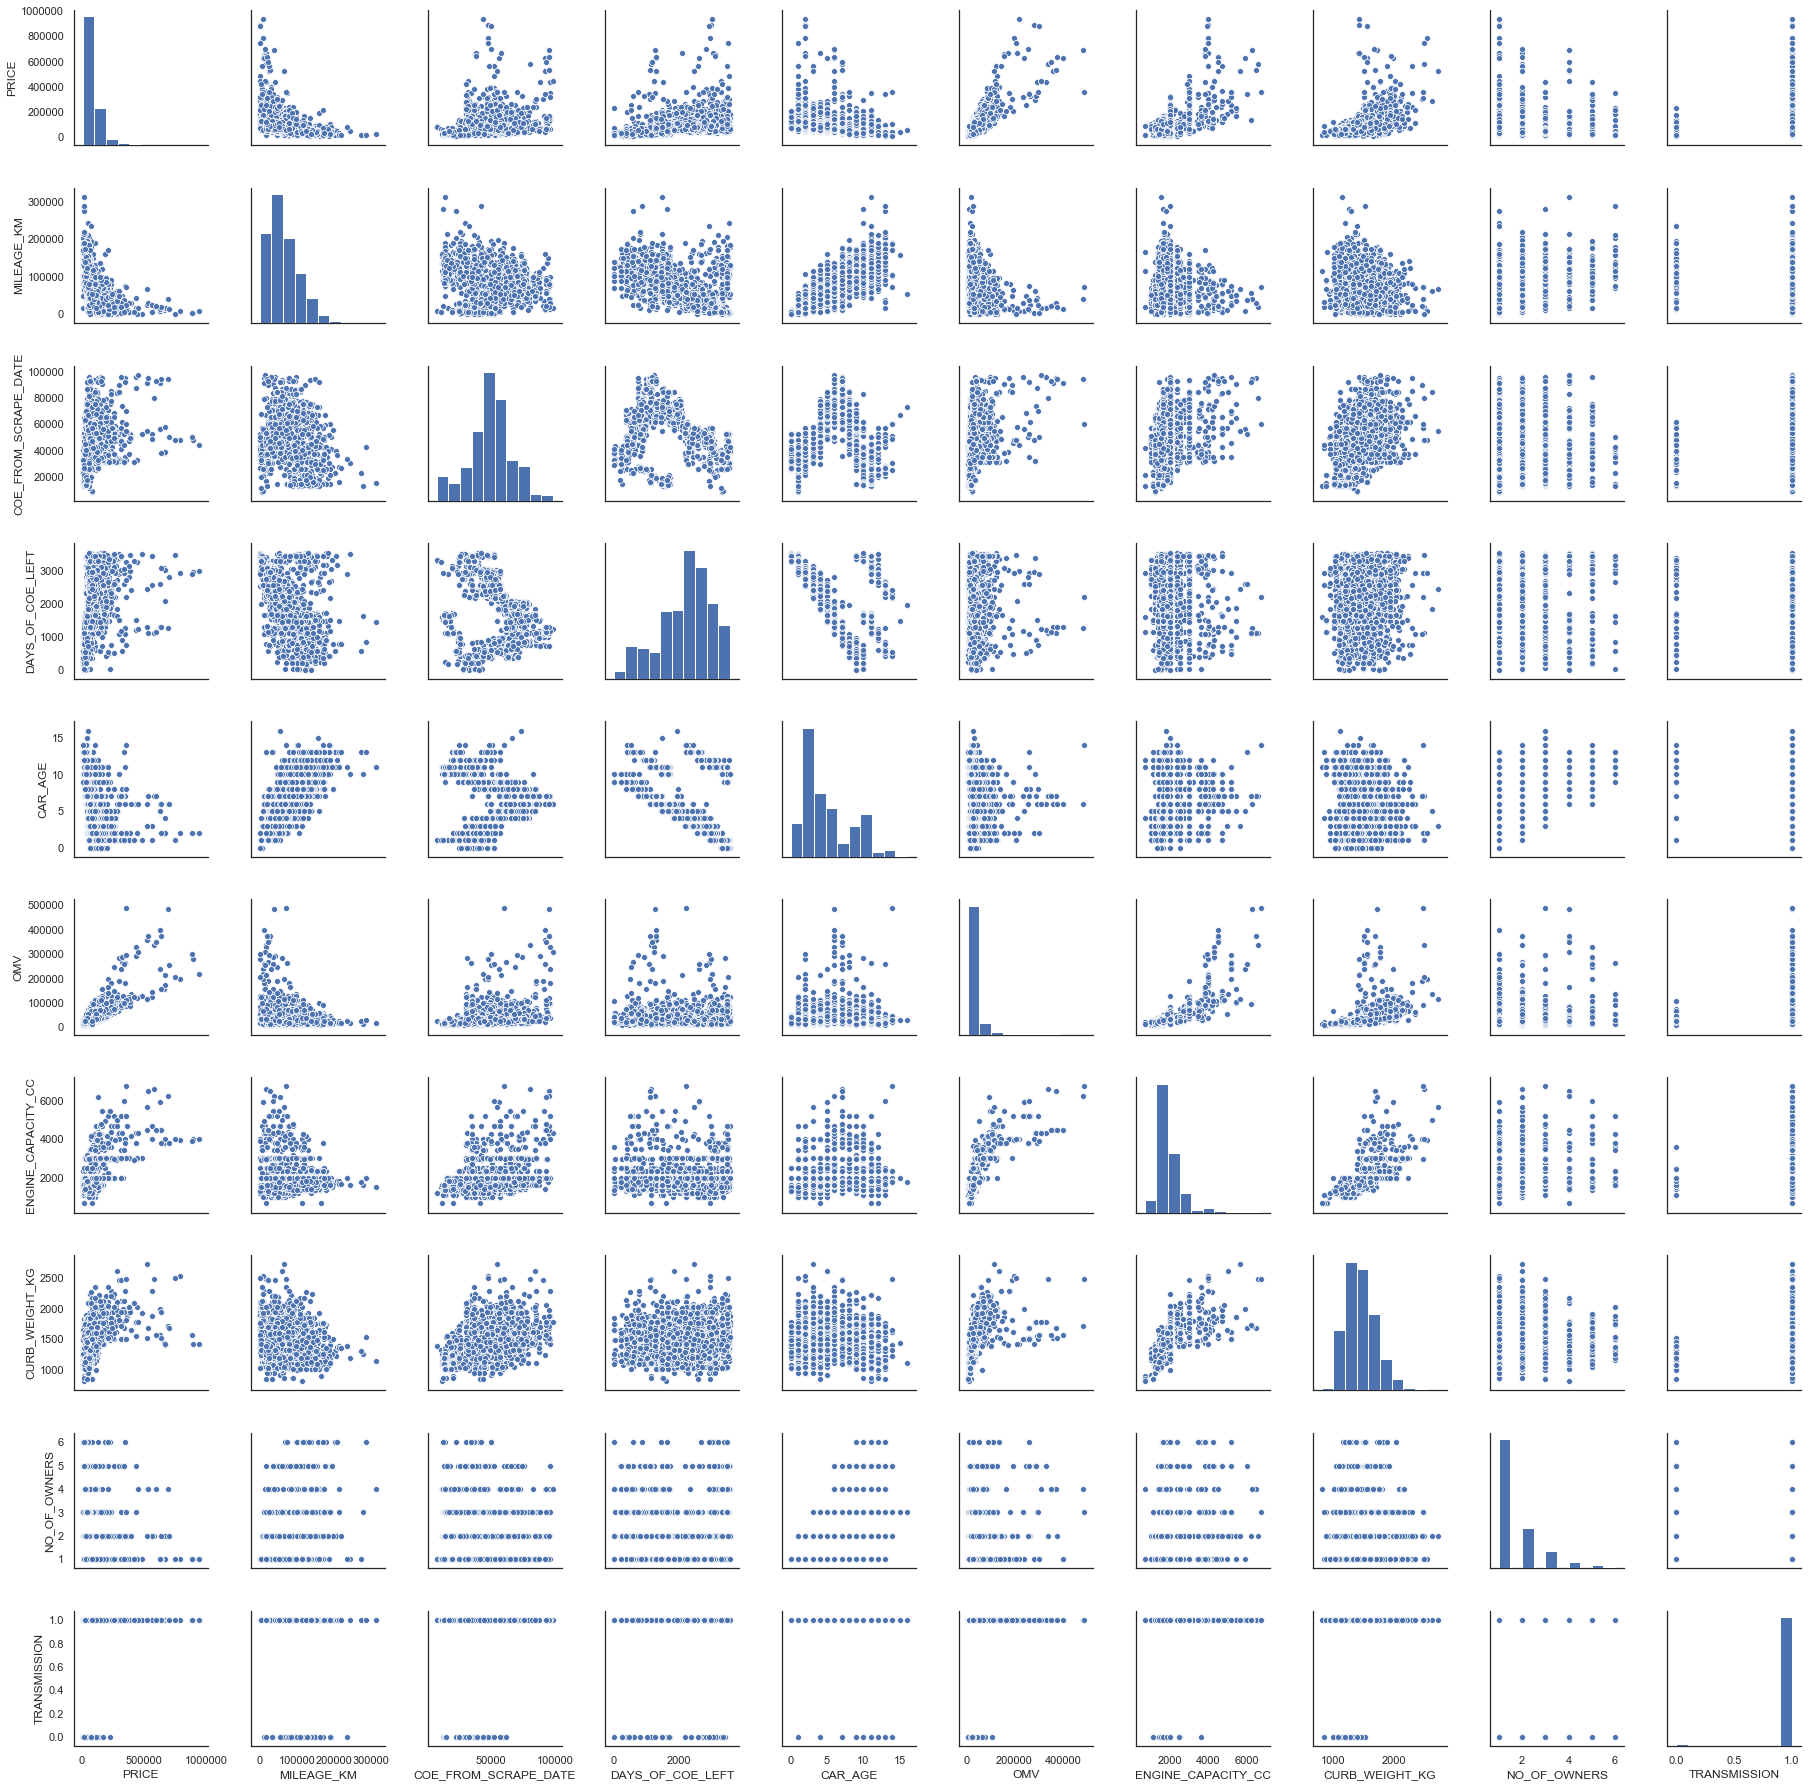

In [ ]:
# Performing a pairplot to visualize the data trends of the variables

# We can see that price and mileage hold a negative linear relationship
# COE from the scrape date doesn't seem to have a very clear relatonship here
# Days of COE seems to have a slight linear r/s
# Car age doesn't seem to have a very distinct relationship here. But generally, the younger the car, the higher the price
# OMV has a clear increasing linear rs with price with price
# Engine capacity seems to also have a increasing linear r/s  with price, with a few outliers in the center
# Perhaps it's because a lot of the higher-priced cars (higher brands) are produced in that engine capacity range?
# Curb weight seems to have a linear r/s too.

sns.pairplot(df_price_no_brands);

##### Histograph of all Variables (Columns) in DataFrame

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286B6F20A90>,
      dtype=object)

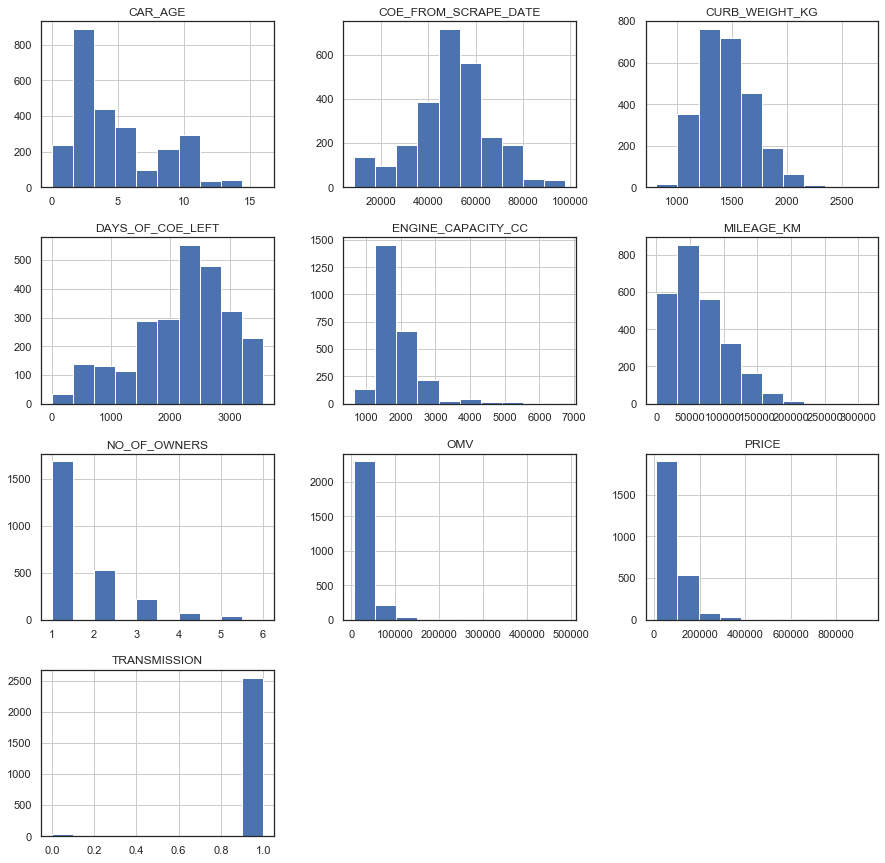

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df_price_no_brands,ax=ax)

In [ ]:
# From the above graphs, it would make sense to apply log transform on the following variables to make them
# more normally distributed
# Mileage
# Engine Cap
# Price
# OMV

## Distribution of Price

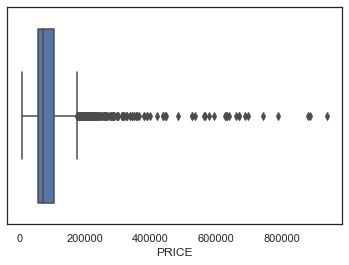

In [ ]:
sns.boxplot(df_price_no_brands['PRICE'])  # 

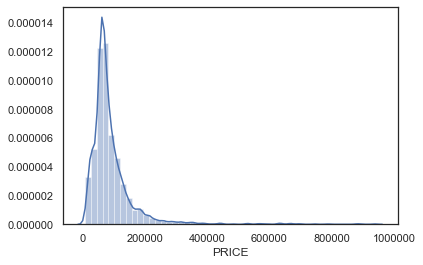

In [ ]:
sns.distplot(df_price_no_brands['PRICE'])  # Your dependent variable 'must' be normally distributed

In [ ]:
# We see that price is right-skewed. Therefore, we can try applying a log onto price, then visualize the data again.

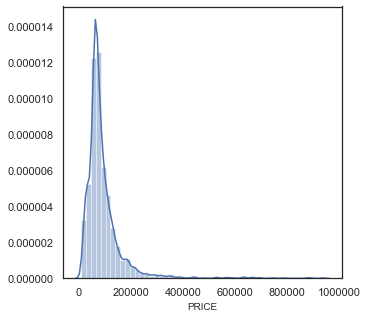

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(df_price_no_brands['PRICE'],ax=ax)
plt.xlabel('PRICE',size=10)
plt.savefig("price_no_log.png",transparent=True)

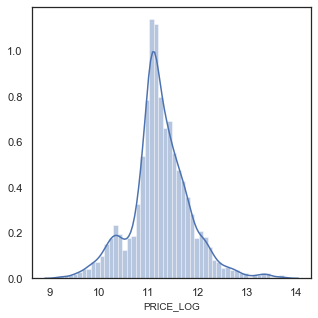

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(np.log(df_price_no_brands['PRICE']),ax=ax)
plt.xlabel("PRICE_LOG",size=10)
plt.savefig("price_log.png",transparent=True)

### Section 3.2.1: Logging Mileage ONLY

In [ ]:
# Creating a copy of the dataframe to work log on
df_price_no_brands_only_mileage_logged = df_price_no_brands.copy()

In [ ]:
# Log Mileage
df_price_no_brands_only_mileage_logged["MILEAGE_LOG"] = df_price_no_brands_only_mileage_logged['MILEAGE_KM'].apply(np.log)
df_price_no_brands_only_mileage_logged

PRICE  MILEAGE_KM  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  CAR_AGE  \
3      70800.0    140800.0               75889.0             761.0      8.0   
4      65800.0    117000.0               39563.0            3503.0     10.0   
5      45000.0    126000.0               41006.0               8.0      9.0   
7      70800.0     41000.0               78810.0            1610.0      6.0   
9      89500.0     57784.0               61103.0            2221.0      4.0   
...        ...         ...                   ...               ...      ...   
3981  103800.0     19000.0               53694.0            2434.0      3.0   
3982  104500.0     47638.0               84504.0            1679.0      5.0   
3983  115000.0     51500.0               67901.0            1950.0      7.0   
3984  119800.0     16000.0               53300.0            2769.0      2.0   
3985   81800.0     53339.0               57501.0            2462.0      4.0   

          OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  TRANSMISSION  \
3     71379.0                2995          2250.0           3.0             1   
4     23465.0                1797          1350.0           2.0             1   
5     56154.0                1796          1650.0           4.0             1   
7     32459.0                1598          1405.0           2.0             1   
9     29913.0                1395          1480.0           2.0             1   
...       ...                 ...             ...           ...           ...   
3981  27886.0                1595          1430.0           1.0             1   
3982  45977.0                3456          2030.0           2.0             1   
3983  52051.0                1796          1600.0           2.0             1   
3984  33570.0                1998          1390.0           1.0             1   
3985  26629.0                2488          1510.0           1.0             1   

      MILEAGE_LOG  
3       11.855096  
4       11.669929  
5       11.744037  
7       10.621327  
9       10.964467  
...           ...  
3981     9.852194  
3982    10.771386  
3983    10.849337  
3984     9.680344  
3985    10.884423  

[2584 rows x 11 columns]

In [ ]:
# Rearranging columns

df_price_no_brands_only_mileage_logged = \
df_price_no_brands_only_mileage_logged[['PRICE', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION']]

In [ ]:
df_price_no_brands_only_mileage_logged.columns

Index(['PRICE', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_price_no_brands_only_mileage_logged[ ['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_price_no_brands_only_mileage_logged['PRICE'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1338.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:24:59   Log-Likelihood:                -30513.
No. Observations:                2584   AIC:                         6.105e+04
Df Residuals:                    2574   BIC:                         6.110e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.014e+05   1.18e+04      8.561      0.000    7.82e+04    1.25e+05
MILEAGE_LOG          -7085.1532    920.002     -7.701      0.000   -8889.172   -5281.134
COE_FROM_SCRAPE_DATE    -0.3993      0.052     -7.717      0.000      -0.501      -0.298
DAYS_OF_COE_LEFT        12.3075      1.099     11.203      0.000      10.153      14.462
CAR_AGE              -5061.4371    385.572    -13.127      0.000   -5817.500   -4305.374
OMV                      1.6409      0.030     54.319      0.000       1.582       1.700
ENGINE_CAPACITY_CC       3.5621      1.909      1.866      0.062      -0.182       7.306
CURB_WEIGHT_KG          38.1714      3.610     10.575      0.000      31.093      45.250
NO_OF_OWNERS         -5117.4490    923.990     -5.538      0.000   -6929.287   -3305.611
TRANSMISSION         -2.629e+04   5563.914     -4.725      0.000   -3.72e+04   -1.54e+04
==============================================================================
Omnibus:                     2109.523   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471245.551
Skew:                           2.976   Prob(JB):                         0.00
Kurtosis:                      68.890   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

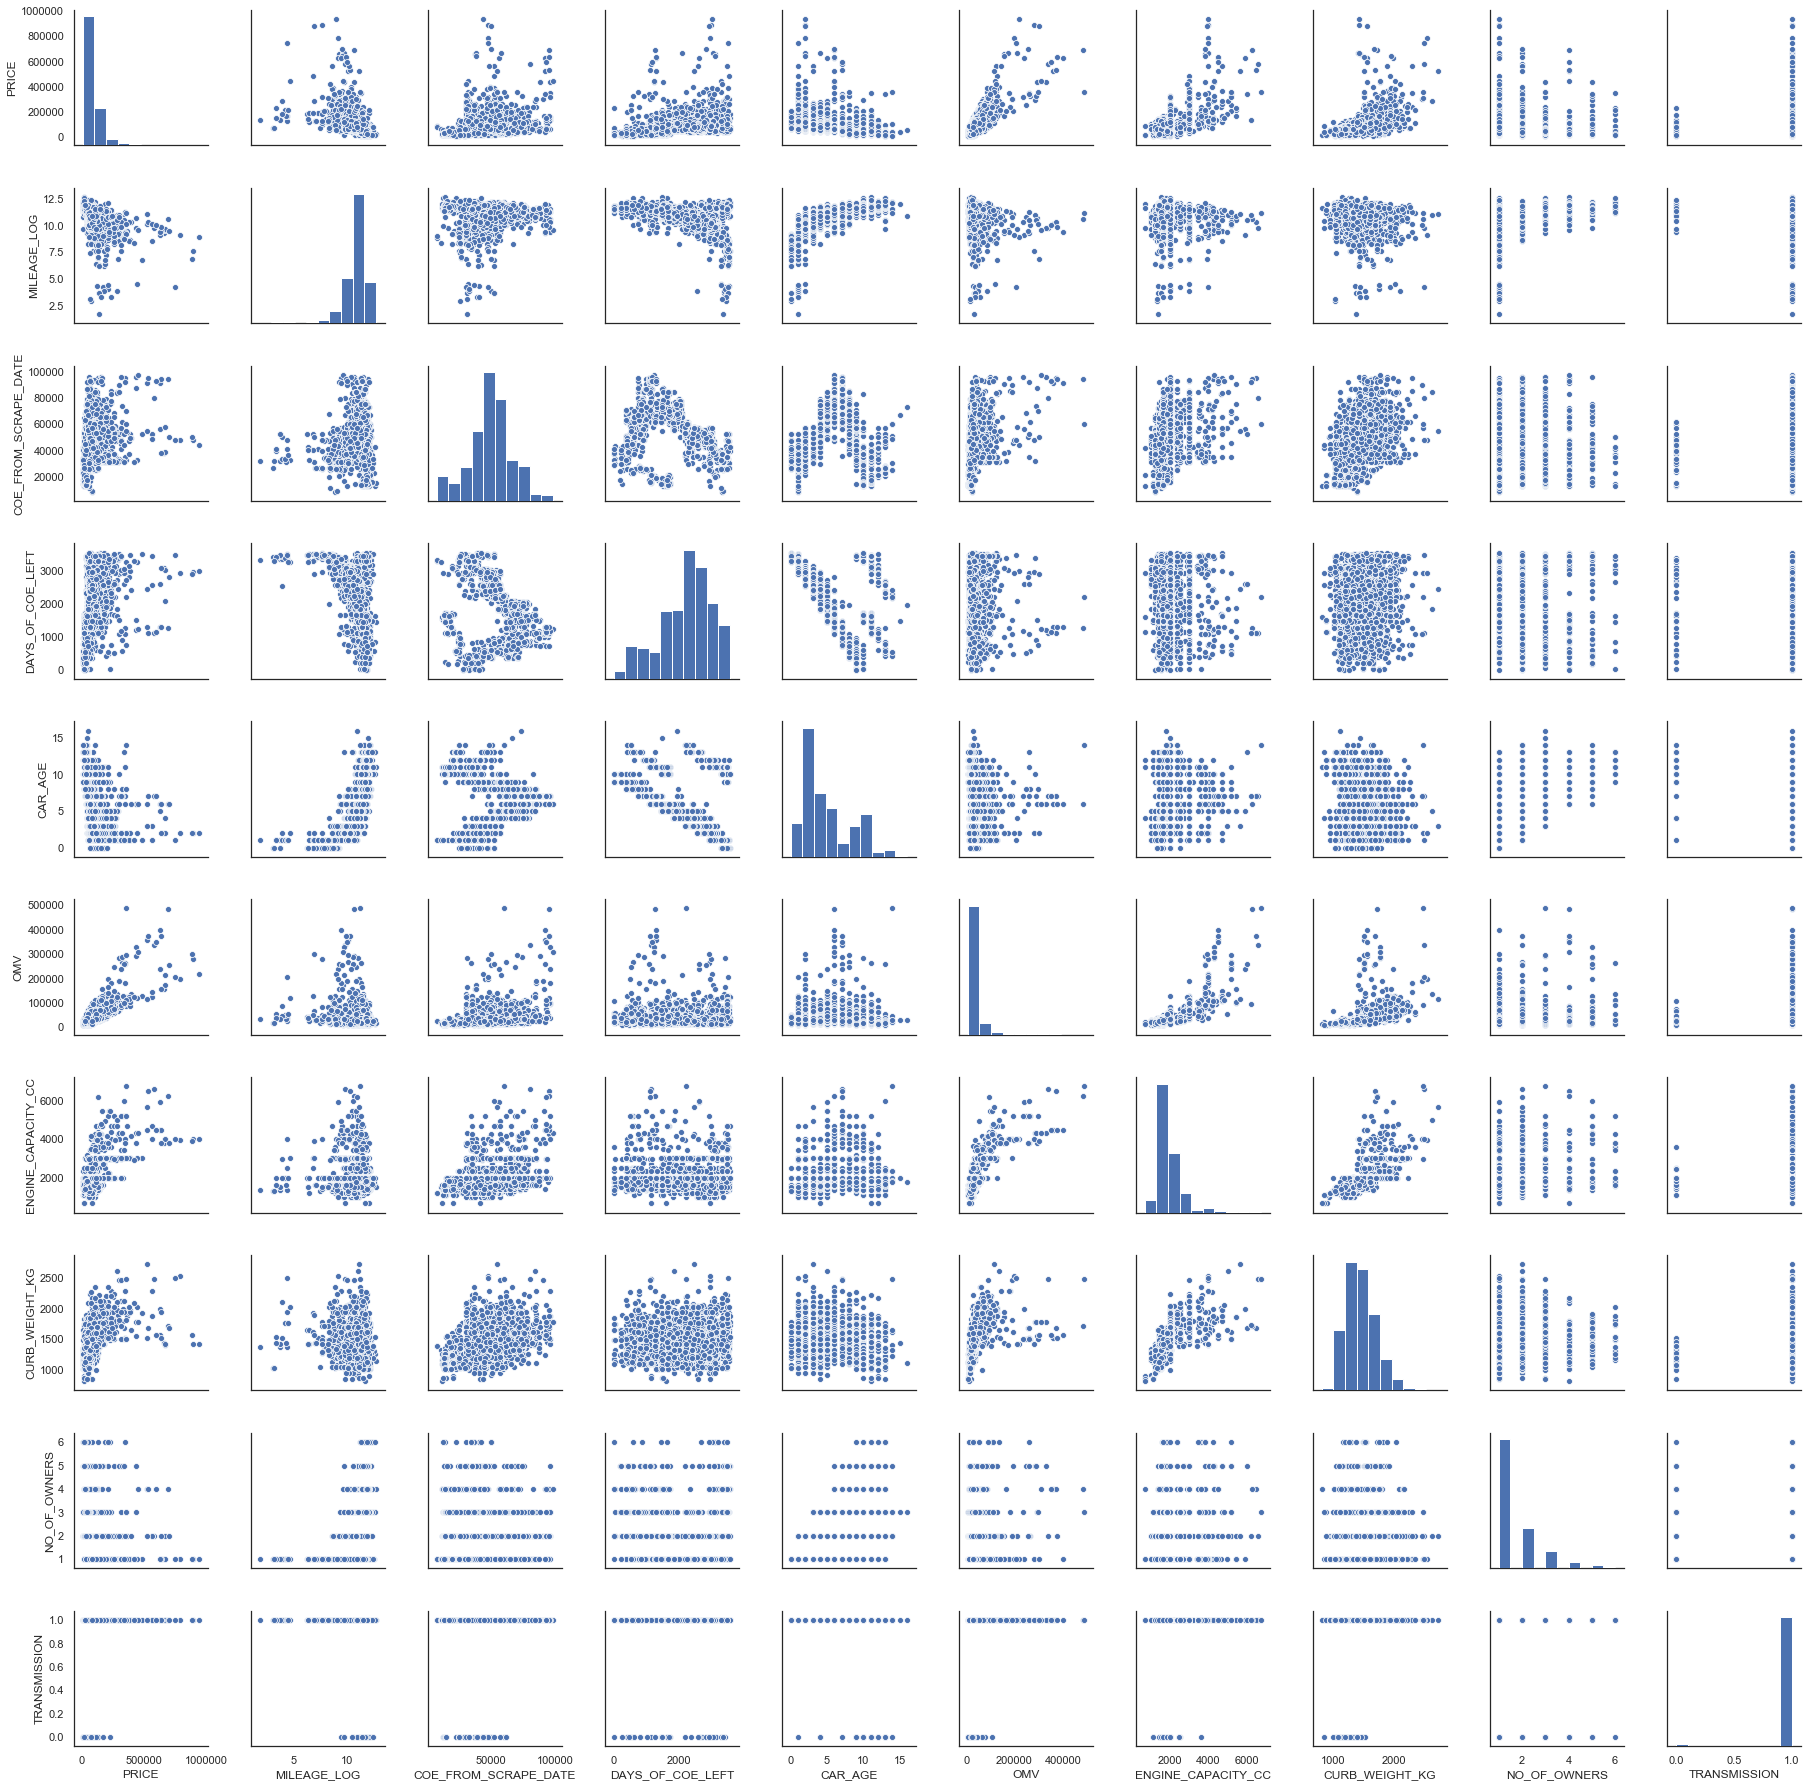

In [ ]:
# Visualizing Pairplots of Price vs Other Features and Only Mileage logged

sns.pairplot(df_price_no_brands_only_mileage_logged);

### Section 3.2.2: Normal Price with Logged Mileage and Squared Engine CC

In [ ]:
# Creating a copy of the dataframe to work log on
df_price_no_brands_mileage_logged_squared_engine_cap = df_price_no_brands_only_mileage_logged.copy()

In [ ]:
# Square Engine CC
df_price_no_brands_mileage_logged_squared_engine_cap["ENGINE_SQUARED"] = \
df_price_no_brands_mileage_logged_squared_engine_cap['ENGINE_CAPACITY_CC'].apply(lambda x: x**2)


In [ ]:
df_price_no_brands_mileage_logged_squared_engine_cap.columns

Index(['PRICE', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'ENGINE_SQUARED'],
      dtype='object')

In [ ]:
# Rearrange columns
df_price_no_brands_mileage_logged_squared_engine_cap = \
df_price_no_brands_mileage_logged_squared_engine_cap[['PRICE', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION']]

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_price_no_brands_mileage_logged_squared_engine_cap[ ['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_price_no_brands_only_mileage_logged['PRICE'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:26:07   Log-Likelihood:                -30510.
No. Observations:                2584   AIC:                         6.104e+04
Df Residuals:                    2574   BIC:                         6.110e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.616e+04   1.19e+04      8.056      0.000    7.28e+04     1.2e+05
MILEAGE_LOG          -7057.6003    919.274     -7.677      0.000   -8860.192   -5255.009
COE_FROM_SCRAPE_DATE    -0.3897      0.052     -7.547      0.000      -0.491      -0.288
DAYS_OF_COE_LEFT        12.5789      1.096     11.474      0.000      10.429      14.729
CAR_AGE              -4840.4997    382.773    -12.646      0.000   -5591.074   -4089.925
OMV                      1.7452      0.033     53.676      0.000       1.681       1.809
ENGINE_SQUARED          -0.0009      0.000     -2.829      0.005      -0.002      -0.000
CURB_WEIGHT_KG          44.6986      3.218     13.890      0.000      38.388      51.009
NO_OF_OWNERS         -4876.3993    922.598     -5.286      0.000   -6685.508   -3067.290
TRANSMISSION         -2.669e+04   5557.439     -4.802      0.000   -3.76e+04   -1.58e+04
==============================================================================
Omnibus:                     2124.160   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           481321.897
Skew:                           3.009   Prob(JB):                         0.00
Kurtosis:                      69.590   Cond. No.                     1.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

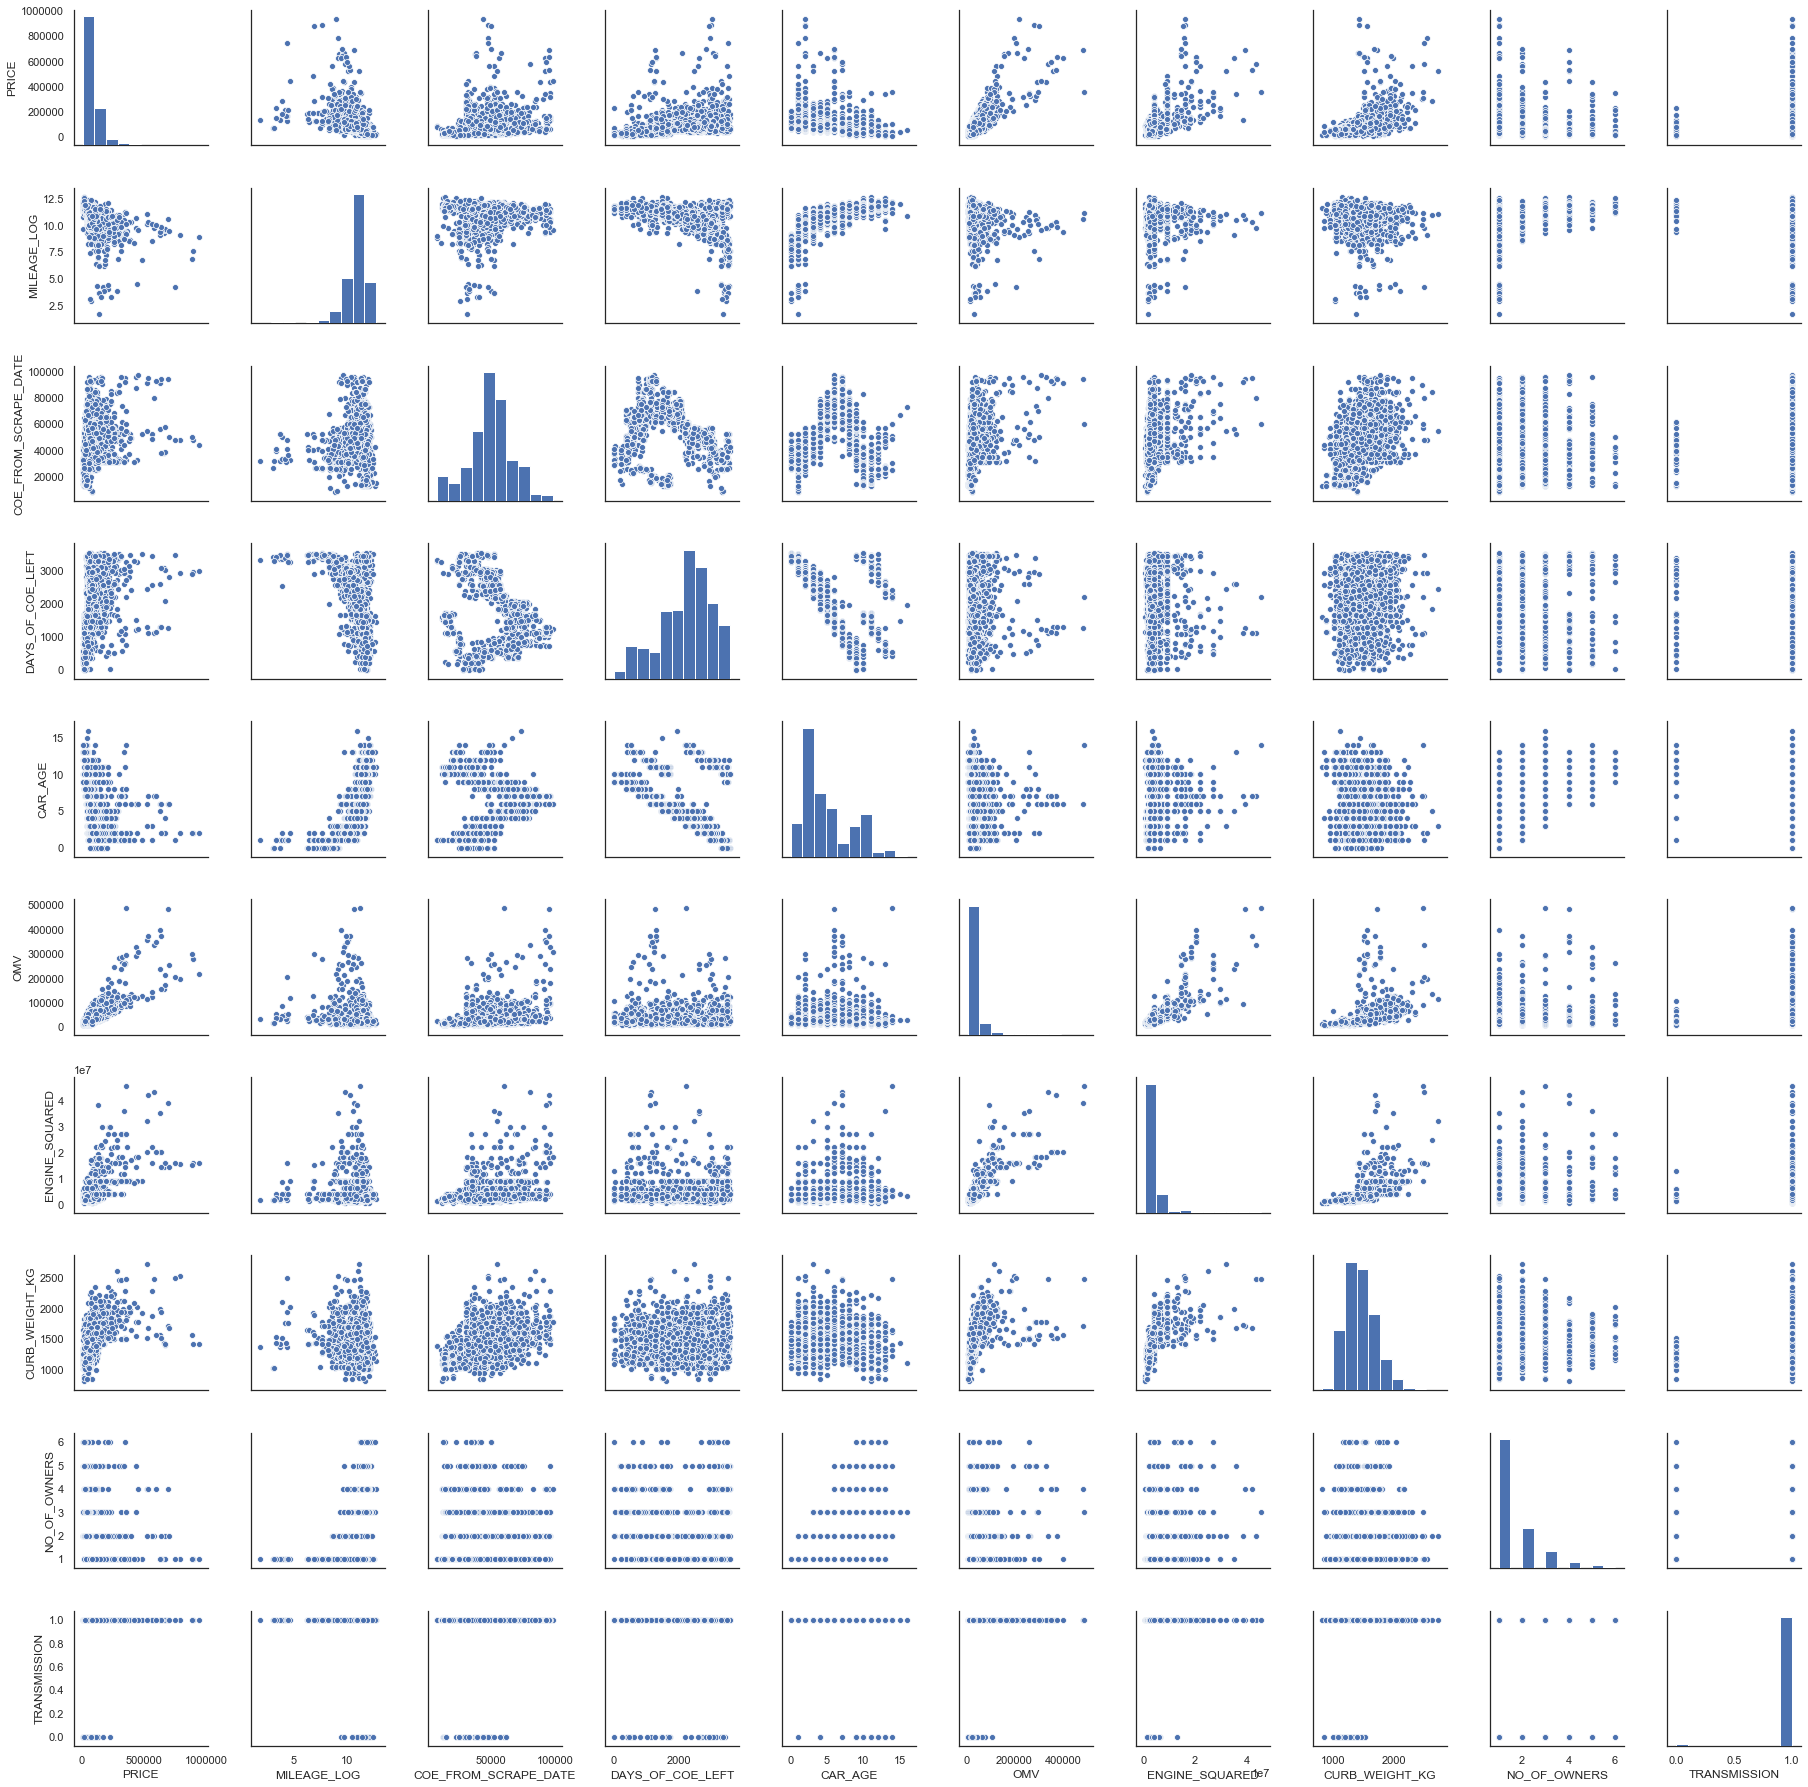

In [ ]:
# Visualizing Pairplots of the distributions

sns.pairplot(df_price_no_brands_mileage_logged_squared_engine_cap);

(10.0, 0.0)

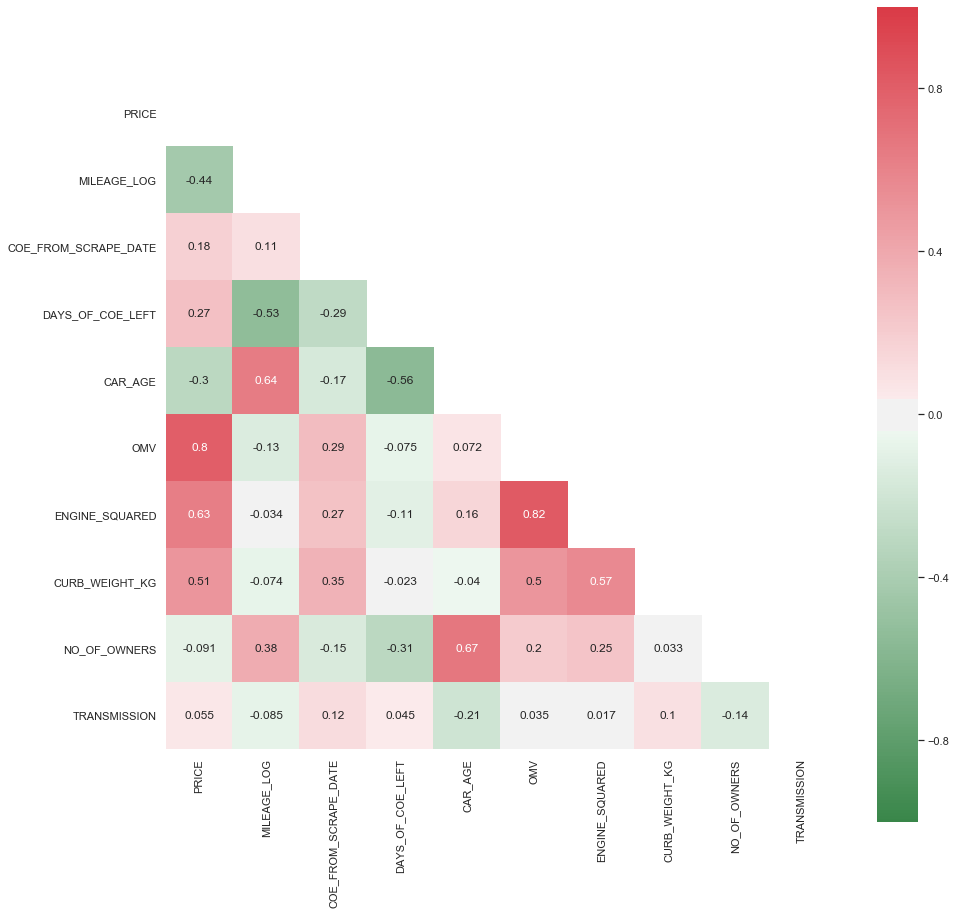

In [ ]:
# Viewing Corr Matrix of Price vs Independent Variables (only logged mileage and squared engine CC)

sns.set(style="white")
data = df_price_no_brands_mileage_logged_squared_engine_cap.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Section 3.2.3: Logged Price with Logged Mileage and Squared Engine CC

In [ ]:
df_logged_price_no_brands_mileage_logged_squared_engine_cap = df_price_no_brands_mileage_logged_squared_engine_cap.copy()

In [ ]:
# Logging Price
df_logged_price_no_brands_mileage_logged_squared_engine_cap['PRICE_LOG'] =\
df_logged_price_no_brands_mileage_logged_squared_engine_cap['PRICE'].apply(np.log)

In [ ]:
# Rearrange columns
df_logged_price_no_brands_mileage_logged_squared_engine_cap = \
df_logged_price_no_brands_mileage_logged_squared_engine_cap[['PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION']]

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_logged_price_no_brands_mileage_logged_squared_engine_cap[ ['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_logged_price_no_brands_mileage_logged_squared_engine_cap['PRICE_LOG'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     2494.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:27:01   Log-Likelihood:                 572.30
No. Observations:                2584   AIC:                            -1125.
Df Residuals:                    2574   BIC:                            -1066.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8017      0.071    137.568      0.000       9.662       9.941
MILEAGE_LOG             -0.0281      0.005     -5.119      0.000      -0.039      -0.017
COE_FROM_SCRAPE_DATE  5.929e-06   3.08e-07     19.236      0.000    5.32e-06    6.53e-06
DAYS_OF_COE_LEFT         0.0003   6.54e-06     42.906      0.000       0.000       0.000
CAR_AGE                 -0.0598      0.002    -26.174      0.000      -0.064      -0.055
OMV                    7.97e-06   1.94e-07     41.062      0.000    7.59e-06    8.35e-06
ENGINE_SQUARED       -7.988e-10   1.88e-09     -0.425      0.671   -4.49e-09    2.89e-09
CURB_WEIGHT_KG           0.0007   1.92e-05     36.108      0.000       0.001       0.001
NO_OF_OWNERS            -0.0032      0.006     -0.573      0.567      -0.014       0.008
TRANSMISSION            -0.1599      0.033     -4.820      0.000      -0.225      -0.095
==============================================================================
Omnibus:                      555.253   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10930.932
Skew:                          -0.490   Prob(JB):                         0.00
Kurtosis:                      13.028   Cond. No.                     1.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Section 3.2.3: Logged Price with Logged Mileage only (no engine squared)

In [ ]:
df_logged_price_no_brands_only_mileage_logged = df_price_no_brands_only_mileage_logged.copy()

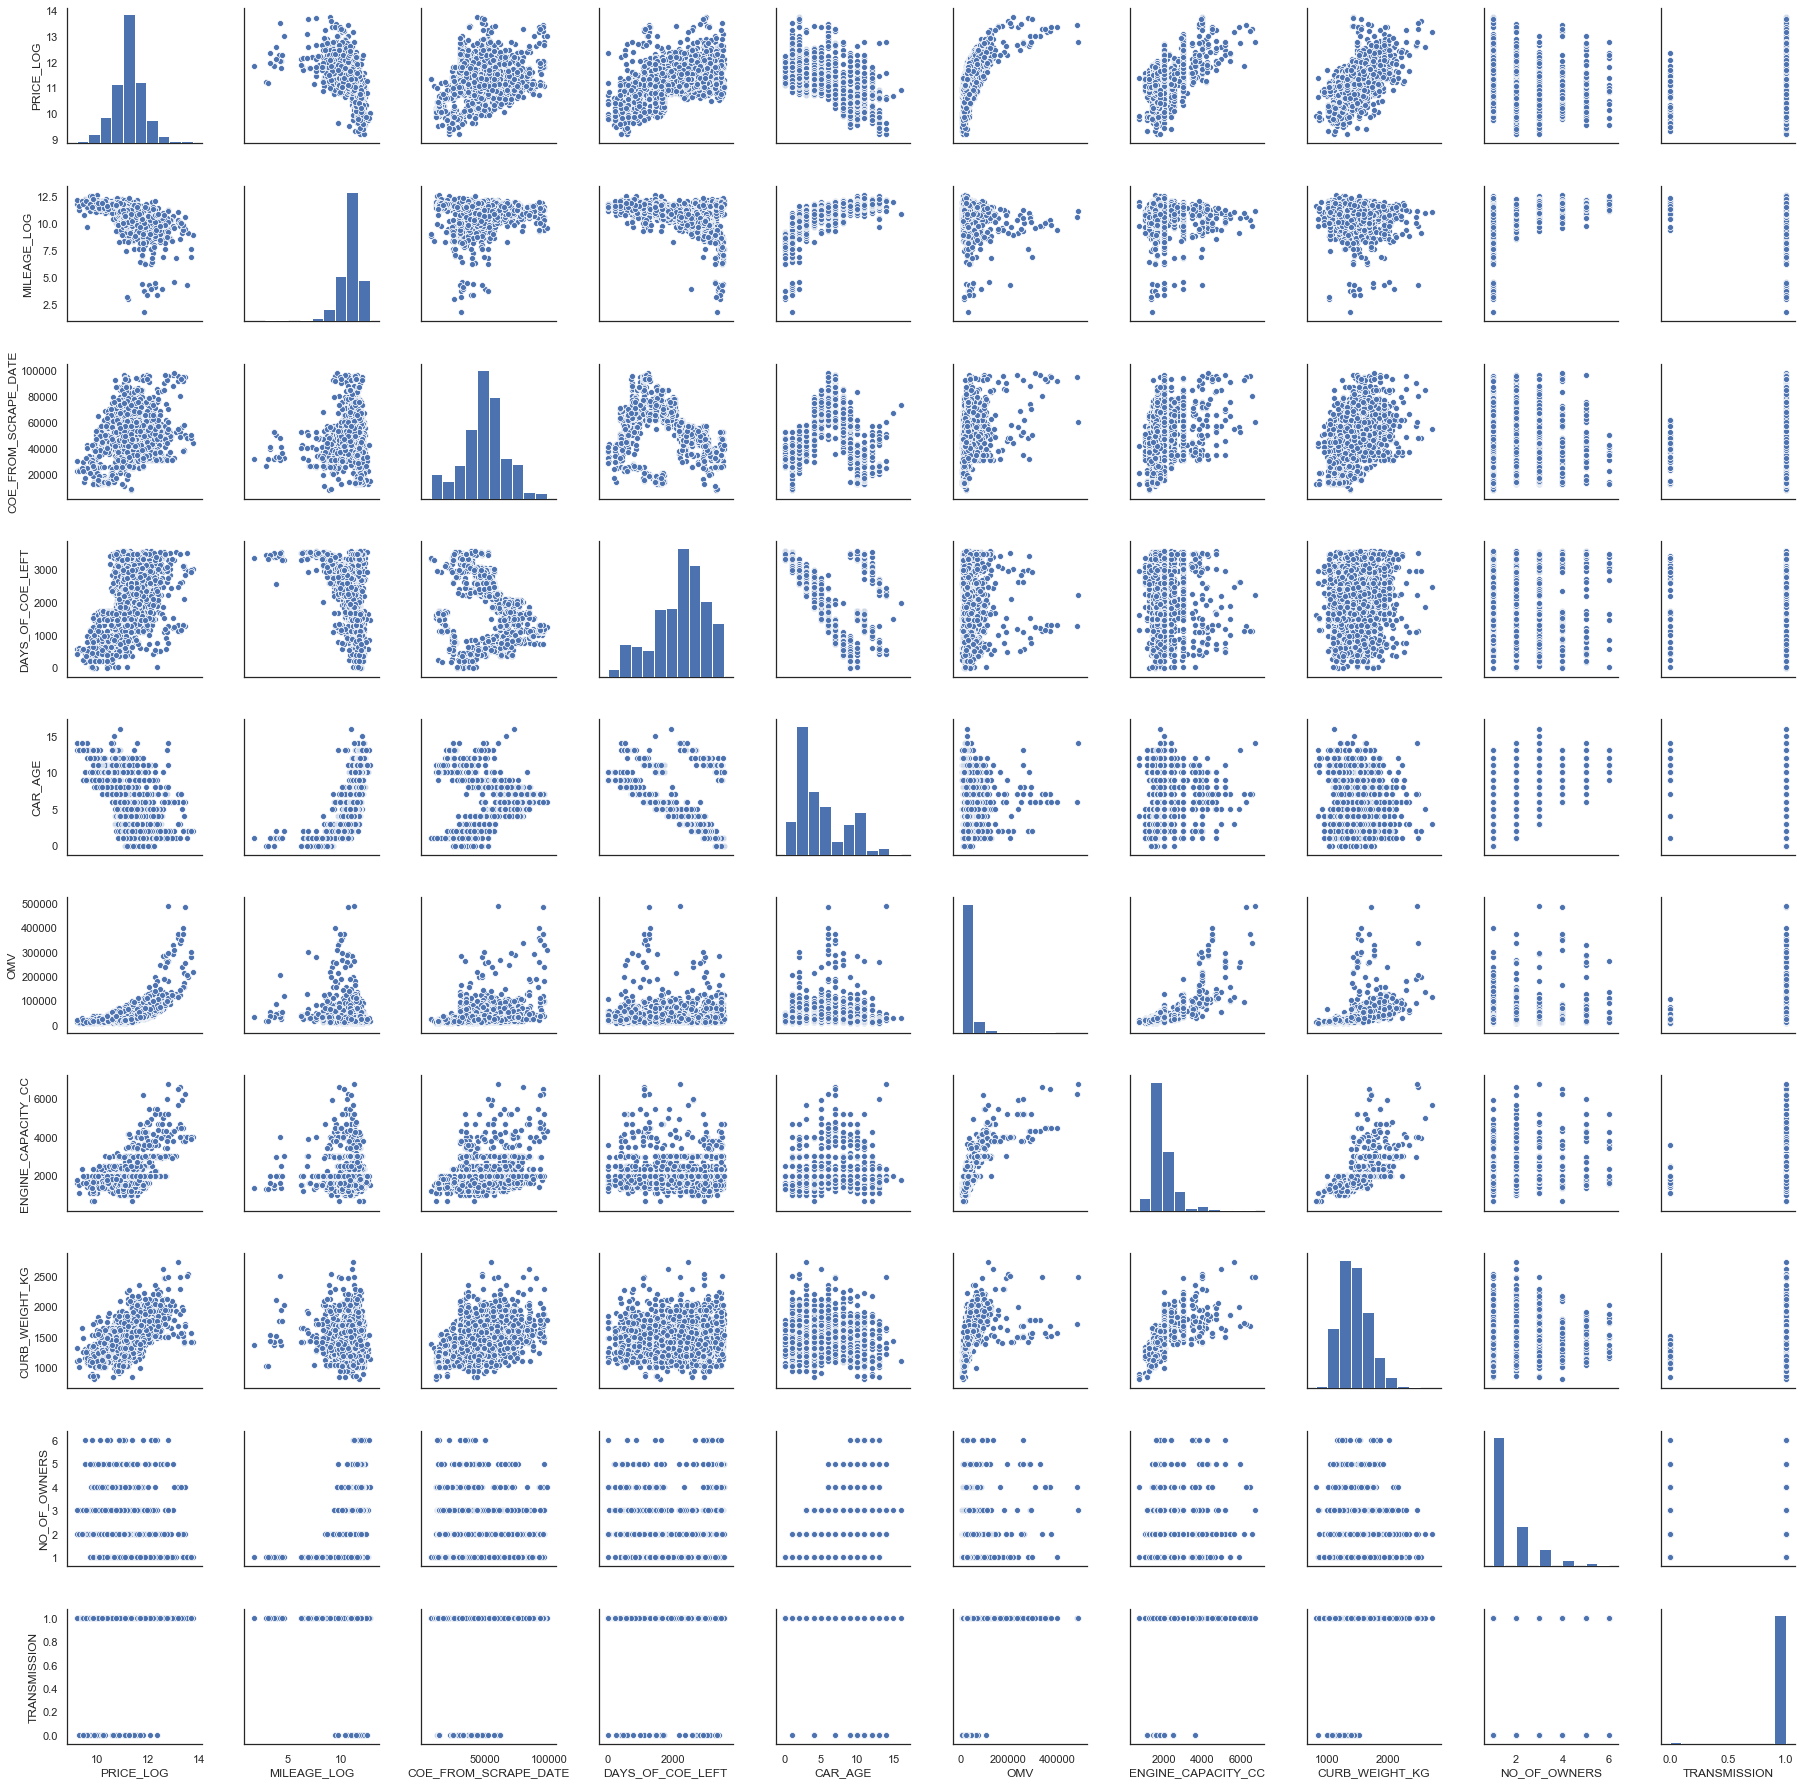

In [ ]:
sns.pairplot(df_logged_price_no_brands_only_mileage_logged);
plt.savefig("log_price_and_mileage.png")

In [ ]:
# Logging Price
df_logged_price_no_brands_only_mileage_logged['PRICE'] = df_logged_price_no_brands_only_mileage_logged['PRICE'].apply(np.log)

# Renaming column
df_logged_price_no_brands_only_mileage_logged.rename(columns={'PRICE':'PRICE_LOG'},inplace=True)

In [ ]:
df_logged_price_no_brands_only_mileage_logged.columns

Index(['PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

In [ ]:
df_logged_price_no_brands_only_mileage_logged.head()

PRICE_LOG  MILEAGE_LOG  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  CAR_AGE  \
3  11.167614    11.855096               75889.0             761.0      8.0   
4  11.094375    11.669929               39563.0            3503.0     10.0   
5  10.714418    11.744037               41006.0               8.0      9.0   
7  11.167614    10.621327               78810.0            1610.0      6.0   
9  11.401994    10.964467               61103.0            2221.0      4.0   

       OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  TRANSMISSION  
3  71379.0                2995          2250.0           3.0             1  
4  23465.0                1797          1350.0           2.0             1  
5  56154.0                1796          1650.0           4.0             1  
7  32459.0                1598          1405.0           2.0             1  
9  29913.0                1395          1480.0           2.0             1

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_logged_price_no_brands_only_mileage_logged[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_logged_price_no_brands_only_mileage_logged['PRICE_LOG'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     2530.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:29:33   Log-Likelihood:                 588.71
No. Observations:                2584   AIC:                            -1157.
Df Residuals:                    2574   BIC:                            -1099.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8193      0.070    139.869      0.000       9.682       9.957
MILEAGE_LOG             -0.0280      0.005     -5.129      0.000      -0.039      -0.017
COE_FROM_SCRAPE_DATE  5.823e-06   3.07e-07     18.987      0.000    5.22e-06    6.42e-06
DAYS_OF_COE_LEFT         0.0003   6.51e-06     42.731      0.000       0.000       0.000
CAR_AGE                 -0.0619      0.002    -27.092      0.000      -0.066      -0.057
OMV                    7.22e-06   1.79e-07     40.332      0.000    6.87e-06    7.57e-06
ENGINE_CAPACITY_CC    6.509e-05   1.13e-05      5.752      0.000    4.29e-05    8.73e-05
CURB_WEIGHT_KG           0.0006   2.14e-05     29.225      0.000       0.001       0.001
NO_OF_OWNERS            -0.0052      0.005     -0.956      0.339      -0.016       0.006
TRANSMISSION            -0.1549      0.033     -4.699      0.000      -0.220      -0.090
==============================================================================
Omnibus:                      511.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8270.650
Skew:                          -0.467   Prob(JB):                         0.00
Kurtosis:                      11.715   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
Price vs Original Independent Variables:  
R^2: **0.820**  
R^2 Adjusted: **0.820**  
df_price_no_brands
  
Price vs Independent Variables (Logged Mileage and Squared Engine CC):  
R^2: **0.824**  
R^2 Adjusted: **0.824**  
df_price_no_brands_mileage_logged_squared_engine_cap
    
Logged Price vs Independent Variables (Logged Mileage and Squared Engine CC (engine squared became irrelevant):
R^2: **0.897**     
R^2 Adjusted: **0.897**   
df_logged_price_no_brands_mileage_logged_squared_engine_cap
  
Logged Price vs Independent Variables (Logged Mileage):
R^2: **0.898**     
R^2 Adjusted: **0.898**  
df_logged_price_no_brands_only_mileage_logged

## Section 3.3: Analysis of Car Brands, Vehicle Types, Brand Categorization

### 3.3.1: Further breaking down dataframe into finalized features (with log price, log mileage)

In [ ]:
df_finalized_features = df_clean2.copy()

In [ ]:
# Applying log to the desired features
df_finalized_features['PRICE'] = df_clean2['PRICE'].apply(np.log)
df_finalized_features['MILEAGE'] = df_clean2['MILEAGE_KM'].apply(np.log)


# Renaming features
df_finalized_features.rename(columns={'PRICE':'PRICE_LOG',
                                     'MILEAGE_KM':'MILEAGE_LOG'},inplace=True)

In [ ]:
df_finalized_features.columns

Index(['BRAND', 'PRICE_LOG', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_LOG',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION', 'Intercept',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]',
       'MILEAGE'],
      dtype='object')

In [ ]:
# Rearranging Columns and removing unwanted variables
df_finalized_features = df_finalized_features[['BRAND','PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'Intercept', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]']]

In [ ]:
df_logged_price_no_brands_only_mileage_logged.columns

Index(['PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

In [ ]:
df_finalized_features.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'Intercept',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]'],
      dtype='object')

### 3.3.2: Joining Brand Dummy Variables into Main Dataframe

In [ ]:
# Creating a new DataFrame for this Brand Categorization
df_categorized_car_brands = df_finalized_features.copy()

In [ ]:
print(df_categorized_car_brands['BRAND'].value_counts())
print(len(df_categorized_car_brands['BRAND'].value_counts()))

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Nissan           127
Audi             127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Jaguar            22
Citroen           22
Renault           19
Chevrolet         19
Maserati          18
Land Rover        16
Ford              14
Infiniti          14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Jeep               3
Skoda              3
Rolls-Royce        2
Lotus              1
Daihatsu           1
Hummer             1
Ssangyong          1
Aston Martin       1
Fiat               1
Alfa Romeo         1
Proton             1
Name: BRAND, dtype: int64
42


In [ ]:
# Creating the relevant columns
df_categorized_car_brands['EXOTIC'] = 0 # Create EXOTIC column
df_categorized_car_brands["ULTRA_LUXURY"] = 0
df_categorized_car_brands["LUXURY"] = 0
df_categorized_car_brands["MID_LEVEL"] = 0
df_categorized_car_brands["ECONOMY"] = 0

In [ ]:
# Labelling Car Brands into Exotic
df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Aston Martin") | 
              (df_clean2['BRAND'] == "Ferrari") |
              (df_clean2['BRAND'] == "Lamborghini") |
              (df_clean2['BRAND'] == "McLaren") |
              (df_clean2['BRAND'] == "Hummer"),
              'EXOTIC'] = 1 

# Labelling Car Brands into Ultra Luxury
df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Bentley") | 
              (df_clean2['BRAND'] == "Land Rover") |
              (df_clean2['BRAND'] == "Maserati") |
              (df_clean2['BRAND'] == "Porsche") |
              (df_clean2['BRAND'] == "Rolls-Royce"), 
              "ULTRA_LUXURY"] = 1 

# Labelling Car Brands into Luxury

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Audi") | 
              (df_clean2['BRAND'] == "BMW") |
              (df_clean2['BRAND'] == "Jeep") |
              (df_clean2['BRAND'] == "Lexus") |
              (df_clean2['BRAND'] == "Lotus") |
              (df_clean2['BRAND'] == "Mercedes-Benz") |
              (df_clean2['BRAND'] == "Volvo") |
              (df_clean2['BRAND'] == "Peugeot"), 
              "LUXURY"] = 1 


# Labelling Car Brands into Mid-Level

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Infiniti") |
              (df_clean2['BRAND'] == "MINI") |
              (df_clean2['BRAND'] == "Volkswagen") |
              (df_clean2['BRAND'] == "Renault") |
              (df_clean2['BRAND'] == "Peugeot"), 
              "MID_LEVEL"] = 1 

# (df_clean2['BRAND'] == "Opel") & "Alfa Romeo" will be considered as "Others" because it is not a very common brand in Singapore

# Labelling Car Brands into Economy

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Chevrolet") | 
              (df_clean2['BRAND'] == "Citroen") |
              (df_clean2['BRAND'] == "Ford") |
              (df_clean2['BRAND'] == "Honda") |
              (df_clean2['BRAND'] == "Hyundai") |
              (df_clean2['BRAND'] == "Kia") |
              (df_clean2['BRAND'] == "Mazda") |
              (df_clean2['BRAND'] == "Mitsubishi") |
              (df_clean2['BRAND'] == "Nissan") |
              (df_clean2['BRAND'] == "Suzuki") |
              (df_clean2['BRAND'] == "Toyota"),
              "ECONOMY"] = 0

# (df_clean2['BRAND'] == "Ssangyong") will be considered as "Others" because it is not a common brand in Singapore


# The rest of the car brands not in these categories will be considered Budget
df_categorized_car_brands["BUDGET"] = 0
df_categorized_car_brands.loc[(df_clean2['BRAND'] == 'Opel') |
              (df_clean2['BRAND'] == 'Ssangyong') |
              (df_clean2['BRAND'] == 'Proton') |
              (df_clean2['BRAND'] == 'Daihatsu') |
              (df_clean2['BRAND'] == 'Fiat') |
              (df_clean2['BRAND'] == 'Alfa Romeo') |
              (df_clean2['BRAND'] == 'Skoda'), 
              'BUDGET'] = 1 

# Changing Uncommon Car brands to "Others"
df_categorized_car_brands.loc[(df_clean2['BRAND'] == 'Opel') |
                  (df_clean2['BRAND'] == 'Ssangyong') |
                  (df_clean2['BRAND'] == 'Proton') |
                  (df_clean2['BRAND'] == 'Daihatsu') |
                  (df_clean2['BRAND'] == 'Fiat') |
                  (df_clean2['BRAND'] == 'Alfa Romeo') |
                  (df_clean2['BRAND'] == 'Skoda') |
                  (df_clean2['BRAND'] == 'Hummer')|
                  (df_clean2['BRAND'] == 'Aston Martin')|
                  (df_clean2['BRAND'] == 'Lotus')|
                  (df_clean2['BRAND'] == 'Ford')|
                  (df_clean2['BRAND'] == 'Jeep'), 
                  'BRAND'] = "Others"


# Group uncommon cars into "Others". There are too many brands to work with.

In [ ]:
print(df_categorized_car_brands['BRAND'].value_counts())
print(len(df_categorized_car_brands['BRAND'].value_counts()))

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Audi             127
Nissan           127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Others            32
Citroen           22
Jaguar            22
Renault           19
Chevrolet         19
Maserati          18
Land Rover        16
Infiniti          14
Peugeot           13
Ferrari           11
Lamborghini        6
Bentley            6
McLaren            5
Rolls-Royce        2
Name: BRAND, dtype: int64
31


##### Brand Dummy Variables Creation

In [ ]:
x_brand_dummy = patsy.dmatrix('BRAND', data=df_categorized_car_brands, return_type='dataframe')
x_brand_dummy.head()

Intercept  BRAND[T.BMW]  BRAND[T.Bentley]  BRAND[T.Chevrolet]  \
3        1.0           0.0               0.0                 0.0   
4        1.0           0.0               0.0                 0.0   
5        1.0           0.0               0.0                 0.0   
7        1.0           1.0               0.0                 0.0   
9        1.0           0.0               0.0                 0.0   

   BRAND[T.Citroen]  BRAND[T.Ferrari]  BRAND[T.Honda]  BRAND[T.Hyundai]  \
3               0.0               0.0             0.0               0.0   
4               0.0               0.0             0.0               0.0   
5               0.0               0.0             0.0               0.0   
7               0.0               0.0             0.0               0.0   
9               0.0               0.0             0.0               0.0   

   BRAND[T.Infiniti]  BRAND[T.Jaguar]  ...  BRAND[T.Others]  BRAND[T.Peugeot]  \
3                0.0              0.0  ...              0.0               0.0   
4                0.0              0.0  ...              0.0               0.0   
5                0.0              0.0  ...              0.0               0.0   
7                0.0              0.0  ...              0.0               0.0   
9                0.0              0.0  ...              0.0               0.0   

   BRAND[T.Porsche]  BRAND[T.Renault]  BRAND[T.Rolls-Royce]  BRAND[T.Subaru]  \
3               0.0               0.0                   0.0              0.0   
4               0.0               0.0                   0.0              0.0   
5               0.0               0.0                   0.0              0.0   
7               0.0               0.0                   0.0              0.0   
9               0.0               0.0                   0.0              0.0   

   BRAND[T.Suzuki]  BRAND[T.Toyota]  BRAND[T.Volkswagen]  BRAND[T.Volvo]  
3              0.0              0.0                  0.0             0.0  
4              0.0              1.0                  0.0             0.0  
5              0.0              0.0                  0.0             0.0  
7              0.0              0.0                  0.0             0.0  
9              0.0              0.0                  0.0             0.0  

[5 rows x 31 columns]

In [ ]:
df_categorized_car_brands.drop('Intercept',axis=1,inplace=True)# Drop intercept because already have intercept from previous vehicle type
df_categorized_car_brands = df_categorized_car_brands.join(x_brand_dummy)
df_categorized_car_brands

BRAND  PRICE_LOG  MILEAGE_LOG  COE_FROM_SCRAPE_DATE  \
3              Audi  11.167614     140800.0               75889.0   
4            Toyota  11.094375     117000.0               39563.0   
5     Mercedes-Benz  10.714418     126000.0               41006.0   
7               BMW  11.167614      41000.0               78810.0   
9              Audi  11.401994      57784.0               61103.0   
...             ...        ...          ...                   ...   
3981  Mercedes-Benz  11.550221      19000.0               53694.0   
3982         Toyota  11.556942      47638.0               84504.0   
3983  Mercedes-Benz  11.652687      51500.0               67901.0   
3984           MINI  11.693579      16000.0               53300.0   
3985         Nissan  11.312033      53339.0               57501.0   

      DAYS_OF_COE_LEFT  CAR_AGE      OMV  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  \
3                761.0      8.0  71379.0                2995          2250.0   
4               3503.0     10.0  23465.0                1797          1350.0   
5                  8.0      9.0  56154.0                1796          1650.0   
7               1610.0      6.0  32459.0                1598          1405.0   
9               2221.0      4.0  29913.0                1395          1480.0   
...                ...      ...      ...                 ...             ...   
3981            2434.0      3.0  27886.0                1595          1430.0   
3982            1679.0      5.0  45977.0                3456          2030.0   
3983            1950.0      7.0  52051.0                1796          1600.0   
3984            2769.0      2.0  33570.0                1998          1390.0   
3985            2462.0      4.0  26629.0                2488          1510.0   

      NO_OF_OWNERS  ...  BRAND[T.Others]  BRAND[T.Peugeot]  BRAND[T.Porsche]  \
3              3.0  ...              0.0               0.0               0.0   
4              2.0  ...              0.0               0.0               0.0   
5              4.0  ...              0.0               0.0               0.0   
7              2.0  ...              0.0               0.0               0.0   
9              2.0  ...              0.0               0.0               0.0   
...            ...  ...              ...               ...               ...   
3981           1.0  ...              0.0               0.0               0.0   
3982           2.0  ...              0.0               0.0               0.0   
3983           2.0  ...              0.0               0.0               0.0   
3984           1.0  ...              0.0               0.0               0.0   
3985           1.0  ...              0.0               0.0               0.0   

      BRAND[T.Renault]  BRAND[T.Rolls-Royce]  BRAND[T.Subaru]  \
3                  0.0                   0.0              0.0   
4                  0.0                   0.0              0.0   
5                  0.0                   0.0              0.0   
7                  0.0                   0.0              0.0   
9                  0.0                   0.0              0.0   
...                ...                   ...              ...   
3981               0.0                   0.0              0.0   
3982               0.0                   0.0              0.0   
3983               0.0                   0.0              0.0   
3984               0.0                   0.0              0.0   
3985               0.0                   0.0              0.0   

      BRAND[T.Suzuki]  BRAND[T.Toyota]  BRAND[T.Volkswagen]  BRAND[T.Volvo]  
3                 0.0              0.0                  0.0             0.0  
4                 0.0              1.0                  0.0             0.0  
5                 0.0              0.0                  0.0             0.0  
7                 0.0              0.0                  0.0             0.0  
9                 0.0              0.0                  0.0             0.0  
...           

### 3.3.4 : Only Brand Segregation

In [ ]:
df_categorized_car_brands.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC',
       'ULTRA_LUXURY', 'LUXURY', 'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept',
       'BRAND[T.BMW]', 'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]',
       'BRAND[T.Citroen]', 'BRAND[T.Ferrari]', 'BRAND[T.Honda]',
       'BRAND[T.Hyundai]', 'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]',
       'BRAND[T.Kia]', 'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]',
       'BRAND[T.Lexus]', 'BRAND[T.MINI]', 'BRAND[T.Maserati]',
       'BRAND[T.Mazda]', 'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]',
       'BRAND[T.Mitsubishi]', 'BRAND[T.Nissan]', 'BRAND[T.Others]',
       'BRAND[T.Peugeot]', 'BRAND[T.Porsche]', 'BRAND

In [ ]:
df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

MILEAGE_LOG  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  CAR_AGE      OMV  \
3        140800.0               75889.0             761.0      8.0  71379.0   
4        117000.0               39563.0            3503.0     10.0  23465.0   
5        126000.0               41006.0               8.0      9.0  56154.0   
7         41000.0               78810.0            1610.0      6.0  32459.0   
9         57784.0               61103.0            2221.0      4.0  29913.0   
...           ...                   ...               ...      ...      ...   
3981      19000.0               53694.0            2434.0      3.0  27886.0   
3982      47638.0               84504.0            1679.0      5.0  45977.0   
3983      51500.0               67901.0            1950.0      7.0  52051.0   
3984      16000.0               53300.0            2769.0      2.0  33570.0   
3985      53339.0               57501.0            2462.0      4.0  26629.0   

      ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  TRANSMISSION  EXOTIC  \
3                   2995          2250.0           3.0             1       0   
4                   1797          1350.0           2.0             1       0   
5                   1796          1650.0           4.0             1       0   
7                   1598          1405.0           2.0             1       0   
9                   1395          1480.0           2.0             1       0   
...                  ...             ...           ...           ...     ...   
3981                1595          1430.0           1.0             1       0   
3982                3456          2030.0           2.0             1       0   
3983                1796          1600.0           2.0             1       0   
3984                1998          1390.0           1.0             1       0   
3985                2488          1510.0           1.0             1       0   

      ULTRA_LUXURY  LUXURY  MID_LEVEL  ECONOMY  BUDGET  
3                0       1          0        0       0  
4                0       0          0        0       0  
5                0       1          0        0       0  
7                0       1          0        0       0  
9                0       1          0        0       0  
...            ...     ...        ...      ...     ...  
3981             0       1          0        0       0  
3982             0       0          0        0       0  
3983             0       1          0        0       0  
3984             0       0          1        0       0  
3985             0       0          0        0       0  

[2584 rows x 15 columns]

In [ ]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']

# Initially my coefficients were difficult to interpret. 
# Therefore I transformed it using log for better explanation purposes

# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2135.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:29:35   Log-Likelihood:                 911.29
No. Observations:                2584   AIC:                            -1793.
Df Residuals:                    2569   BIC:                            -1705.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7421      0.043    224.613      0.000       9.657       9.827
MILEAGE_LOG          -7.627e-07    1.5e-07     -5.078      0.000   -1.06e-06   -4.68e-07
COE_FROM_SCRAPE_DATE  4.544e-06   2.64e-07     17.214      0.000    4.03e-06    5.06e-06
DAYS_OF_COE_LEFT         0.0003   5.81e-06     48.698      0.000       0.000       0.000
CAR_AGE                 -0.0581      0.002    -25.365      0.000      -0.063      -0.054
OMV                   6.382e-06   2.31e-07     27.678      0.000    5.93e-06    6.83e-06
ENGINE_CAPACITY_CC       0.0001   1.07e-05     11.495      0.000       0.000       0.000
CURB_WEIGHT_KG           0.0004   2.11e-05     20.029      0.000       0.000       0.000
NO_OF_OWNERS            -0.0110      0.005     -2.249      0.025      -0.021      -0.001
TRANSMISSION            -0.1641      0.029     -5.632      0.000      -0.221      -0.107
EXOTIC                  -0.0389      0.060     -0.648      0.517      -0.157       0.079
ULTRA_LUXURY             0.2656      0.023     11.303      0.000       0.220       0.312
LUXURY                   0.2156      0.009     24.415      0.000       0.198       0.233
MID_LEVEL                0.0834      0.013      6.216      0.000       0.057       0.110
ECONOMY                       0          0        nan        nan           0           0
BUDGET                  -0.0045      0.050     -0.091      0.927      -0.102       0.093
==============================================================================
Omnibus:                      584.846   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12703.299
Skew:                          -0.518   Prob(JB):                         0.00
Kurtosis:                      13.813   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### R^2 Summary from Linear Regression Models
Price vs Original Independent Variables:  
R^2: **0.820**  
R^2 Adjusted: **0.820**  
df_price_no_brands
  
Price vs Independent Variables (Logged Mileage and Squared Engine CC):  
R^2: **0.824**  
R^2 Adjusted: **0.824**  
df_price_no_brands_mileage_logged_squared_engine_cap
    
Logged Price vs Independent Variables (Logged Mileage and Squared Engine CC (engine squared became irrelevant):
R^2: **0.897**     
R^2 Adjusted: **0.897**   
df_logged_price_no_brands_mileage_logged_squared_engine_cap
  
Logged Price vs Independent Variables (Logged Mileage):
R^2: **0.898**     
R^2 Adjusted: **0.898**  
df_logged_price_no_brands_only_mileage_logged  
  
Logged Price vs Independent Variables (Logged Mileage) + Categorized Car Brands:
R^2: **0.921**     
R^2 Adjusted: **0.921**  
df_categorized_car_brands

## Section 4.2: Cross-Validation Using Models other than LR

### Section 4.2.1 : Using LassoCV to find best Alpha Value for L1 Regularization

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=20)

In [ ]:

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train/validation (the whole 80%) and test set (the whole 20%)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# LassoCV does 2 things for you. It trains your model, and it also chooses the best lambda/alpha for you.  
# But of course, you have to feed it a list of lambdas to try.

# The best part about LambdaCV is that it does all 3 for you:
# Fit
# Finding best lambda
# Doing Cross-Validation

from sklearn.model_selection import KFold   #Kfold will allow you to do cross validation

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-3,3,200) # Defining a vector of lambdas (alpha) to try from
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)  # Creating a partitioned randomized-state data

lasso_model = LassoCV(alphas = alphavec, cv=kf)  # If you want to use Ridge, use RidgeCV
lasso_model.fit(X_train_scaled, y_train)

# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.0032550885998350564

In [ ]:
# These are the (standardized) coefficients found when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('MILEAGE_LOG', -0.03689110265680966),
 ('COE_FROM_SCRAPE_DATE', 0.06481376606248887),
 ('DAYS_OF_COE_LEFT', 0.21812096373130438),
 ('CAR_AGE', -0.17695678924170913),
 ('OMV', 0.26330195415653385),
 ('ENGINE_CAPACITY_CC', 0.06969015644788246),
 ('CURB_WEIGHT_KG', 0.10542852759678789),
 ('NO_OF_OWNERS', -0.010508119632416752),
 ('TRANSMISSION', -0.02332597379628407),
 ('EXOTIC', -0.02889039617933594),
 ('ULTRA_LUXURY', 0.0328461338537053),
 ('LUXURY', 0.05758408083998944),
 ('MID_LEVEL', 0.0),
 ('ECONOMY', -0.04142286228425683),
 ('BUDGET', -0.0)]

In [ ]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Make predictions on the test set using the new model 
# (the model is already using the best alpha. It is a LassoCV initialization)
val_set_pred = lasso_model.predict(X_val_scaled)

# Find the MAE and R^2 on the test set using this model
print(f"LassoCV Best Lambda (alpha): {lasso_model.alpha_}")
print(f"LassoCV RMSE: {RMSE(y_val, val_set_pred)}")
print(f"LassoCV R^2 Score: {r2_score(y_val, val_set_pred)}")

LassoCV Best Lambda (alpha): 0.0032550885998350564
LassoCV RMSE: 0.2060456832969135
LassoCV R^2 Score: 0.8908070012251001


### Section 4.2.2: Using RidgeCV to find best Alpha Value for L2 Regularization

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=20)

In [ ]:
# Use RidgeCV to find the optimal ALPHA value for L2 regularization

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

# Scale the Predictors on both the train and validation set (for RidgeCV)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model on all the data with that alpha (RidgeCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200) # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

ridge_model = RidgeCV(alphas=alphavec, cv=kf)
ridge_model.fit(X_train_scaled, y_train)  # Fit your scaled train input and your y train values

# This is the best alpha value found
ridge_model.alpha_

21.96385372416547

In [ ]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('MILEAGE_LOG', -0.042394292256485146),
 ('COE_FROM_SCRAPE_DATE', 0.06678341343292019),
 ('DAYS_OF_COE_LEFT', 0.21841575383069542),
 ('CAR_AGE', -0.1716508933134741),
 ('OMV', 0.2577164568452119),
 ('ENGINE_CAPACITY_CC', 0.07655344165346685),
 ('CURB_WEIGHT_KG', 0.10350971130241264),
 ('NO_OF_OWNERS', -0.014649744302495105),
 ('TRANSMISSION', -0.027096576516797567),
 ('EXOTIC', -0.029496516213225302),
 ('ULTRA_LUXURY', 0.037397703001438846),
 ('LUXURY', 0.06504754305742101),
 ('MID_LEVEL', 0.004835938074657496),
 ('ECONOMY', -0.037328614642465174),
 ('BUDGET', -0.0003095576440478138)]

In [ ]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Make predictions on the test set using the new model and save it into a variable
val_set_pred = lasso_model.predict(X_val_scaled)


# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) RidgeCV: {ridge_model.alpha_}")
print(f"RidgeCV MAE: {RMSE(y_val, val_set_pred)}")
print(f"RidgeCV R^2 Score: {r2_score(y_val, val_set_pred)}")

Best Lambda (alpha) RidgeCV: 21.96385372416547
RidgeCV MAE: 0.2060456832969135
RidgeCV R^2 Score: 0.8908070012251001


### Section 4.2.3: Using ElasticnetCV to find best Alpha Value 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=20)

In [ ]:
# Using ElasticNetCV to find the optimal ALPHA value
# Scale the data as before (scaling is a must for regularization)
std = StandardScaler()
std.fit(X_train.values) # (60% of the data)

# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scalred = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model and all the data using that alpha (ElasticNetCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200)  # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

elasticnet_model = ElasticNetCV(alphas = alphavec, cv=kf)
elasticnet_model.fit(X_train_scaled, y_train)  # Fitting standardscaled input and true y values into model to train it

elasticnet_model.alpha_

0.006080224261649421

In [ ]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, elasticnet_model.coef_))

[('MILEAGE_LOG', -0.03837190175452888),
 ('COE_FROM_SCRAPE_DATE', 0.06478560224721128),
 ('DAYS_OF_COE_LEFT', 0.2174561074427263),
 ('CAR_AGE', -0.17563704481132553),
 ('OMV', 0.25958740349987547),
 ('ENGINE_CAPACITY_CC', 0.07126100701743189),
 ('CURB_WEIGHT_KG', 0.10532508487078017),
 ('NO_OF_OWNERS', -0.010911873656657658),
 ('TRANSMISSION', -0.023449556858663432),
 ('EXOTIC', -0.027156002700613833),
 ('ULTRA_LUXURY', 0.03365270850201948),
 ('LUXURY', 0.058052096561623016),
 ('MID_LEVEL', 0.0),
 ('ECONOMY', -0.0418436736583076),
 ('BUDGET', -0.0)]

In [ ]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Use this model to do prediction on a validation data set
val_set_pred = elasticnet_model.predict(X_val_scaled)

# Find the MAE and R^2 on the test set using this model
print(f'Best Lambda (Alpha) ElasticNetCV: {elasticnet_model.alpha_}')
print(f'ElasticNetCV RMSE: {RMSE(y_val, val_set_pred)}')  # mae is a defined function above
print(f'ElasticNetCV R^2 Score: {r2_score(y_val, val_set_pred)}')  # r2_score is an imported module

Best Lambda (Alpha) ElasticNetCV: 0.006080224261649421
ElasticNetCV RMSE: 0.20546000914492651
ElasticNetCV R^2 Score: 0.8914268698533193


### Section 4.2.3: Summary from the above Train-Validation Sets

LassoCV Best Lambda (alpha): 0.0032550885998350564  
LassoCV RMSE: 0.2060456832969135  
LassoCV R^2 Score: 0.8908070012251001  
  
Best Lambda (alpha) RidgeCV: 21.96385372416547  
RidgeCV MAE: 0.2060456832969135  
RidgeCV R^2 Score: 0.8908070012251001  
  
Best Lambda (Alpha) ElasticNetCV: 0.006080224261649421  
ElasticNetCV RMSE: 0.20546000914492651    
ElasticNetCV R^2 Score: 0.8914268698533193  

### Section 4.3: Picking Model with the best R^2 score (Train and Cross-Validation)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# Create 80% of train data. The code below will automate the cross-validation
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [ ]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


#Feature transform/scaling so that we can run our ridge/lasso/elasticnet model 
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val.values)

#Feature transform/scaling so that we can run our poly model 
poly = PolynomialFeatures(degree=2) 
X_train_val_poly = poly.fit_transform(X_train_val.values)

kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

lm = LinearRegression()
cvs_lm = cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2')
print("Linear Regression Cross Val Score: {}".format(cvs_lm))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3),'\n' )


lm_ridge = Ridge(alpha=21.96385372416547 )
cvs_ridge = cross_val_score(lm_ridge, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Ridge Cross Val Score: {}".format(cvs_ridge))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3),'\n' )



lm_lasso = Lasso(alpha=0.0032550885998350564)
cvs_lasso = cross_val_score(lm_lasso, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Lasso Cross Val Score: {}".format(cvs_lasso))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3),'\n' )


lm_elasticnet = ElasticNet(alpha=0.006080224261649421 )
cvs_elasticnet = cross_val_score(lm_elasticnet, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Elastic Net Cross Val Score: {}".format(cvs_elasticnet))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3),'\n' )


lm_poly = LinearRegression()
cvs_poly = cross_val_score(lm_poly, X_train_val_poly, y_train_val, cv=kf, scoring='r2')
print("Poly Regression Cross Val Score: {}".format(cvs_poly))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Degree 2 polynomial Regression cv R^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3) )

Linear Regression Cross Val Score: [0.92144556 0.90568859 0.92646982 0.92521773 0.88399617]
Linear regression cv R^2: 0.913 +- 0.016 

Ridge Cross Val Score: [0.92031216 0.90489814 0.92713366 0.92451871 0.88843608]
Ridge regression cv R^2: 0.913 +- 0.015 

Lasso Cross Val Score: [0.91978311 0.90517028 0.92667215 0.92642814 0.88811783]
Lasso regression cv R^2: 0.913 +- 0.015 

Elastic Net Cross Val Score: [0.91973094 0.90508019 0.92684403 0.92631566 0.88885101]
ElasticNet regression cv R^2: 0.913 +- 0.015 

Poly Regression Cross Val Score: [0.63927277 0.83611875 0.89198478 0.95281637 0.82403863]
Degree 2 polynomial Regression cv R^2: 0.829 +- 0.105


In [ ]:
# From the code above, it seems like Linear Regression provides similar results as compared to the rest.
# Therefore, will choose to use linear regression for it's simplicity and ease of use

# Section 5: Model Testing (On whole DataSet)

## Section 5.1: Training Model on 80% DataSet

In [ ]:
df_categorized_car_brands.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC',
       'ULTRA_LUXURY', 'LUXURY', 'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept',
       'BRAND[T.BMW]', 'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]',
       'BRAND[T.Citroen]', 'BRAND[T.Ferrari]', 'BRAND[T.Honda]',
       'BRAND[T.Hyundai]', 'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]',
       'BRAND[T.Kia]', 'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]',
       'BRAND[T.Lexus]', 'BRAND[T.MINI]', 'BRAND[T.Maserati]',
       'BRAND[T.Mazda]', 'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]',
       'BRAND[T.Mitsubishi]', 'BRAND[T.Nissan]', 'BRAND[T.Others]',
       'BRAND[T.Peugeot]', 'BRAND[T.Porsche]', 'BRAND

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'Intercept', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# Create 80% of train data. The code below will automate the cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [ ]:
# model / fit / summarize
import statsmodels.api as sm

lm_model = LinearRegression()
lm_model = sm.OLS(y_train, X_train)  # no need sm.add_constant because there's already an intercept
results = lm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1622.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:58:37   Log-Likelihood:                 720.99
No. Observations:                2067   AIC:                            -1410.
Df Residuals:                    2051   BIC:                            -1320.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MILEAGE_LOG          -5.804e-07   1.71e-07     -3.400      0.001   -9.15e-07   -2.46e-07
COE_FROM_SCRAPE_DATE  4.404e-06   2.98e-07     14.778      0.000    3.82e-06    4.99e-06
DAYS_OF_COE_LEFT         0.0003   6.54e-06     43.856      0.000       0.000       0.000
CAR_AGE                 -0.0585      0.003    -22.467      0.000      -0.064      -0.053
OMV                   5.968e-06   2.48e-07     24.021      0.000    5.48e-06    6.46e-06
ENGINE_CAPACITY_CC       0.0001   1.16e-05     10.554      0.000    9.97e-05       0.000
CURB_WEIGHT_KG           0.0004   2.37e-05     18.887      0.000       0.000       0.000
NO_OF_OWNERS            -0.0146      0.006     -2.650      0.008      -0.025      -0.004
TRANSMISSION            -0.1277      0.033     -3.905      0.000      -0.192      -0.064
Intercept                9.7336      0.055    178.225      0.000       9.627       9.841
EXOTIC                   0.0336      0.067      0.504      0.614      -0.097       0.164
ULTRA_LUXURY             0.1916      0.032      6.052      0.000       0.130       0.254
LUXURY                   0.1656      0.021      7.887      0.000       0.124       0.207
MID_LEVEL                0.0377      0.024      1.588      0.112      -0.009       0.084
ECONOMY                 -0.0633      0.021     -2.993      0.003      -0.105      -0.022
BUDGET                  -0.1069      0.058     -1.844      0.065      -0.221       0.007
==============================================================================
Omnibus:                      402.757   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6828.093
Skew:                          -0.420   Prob(JB):                         0.00
Kurtosis:                      11.864   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
**------------------**  
**Best Data Set (80% of data on train, 20% on test)**  
Logged Price vs Independent Variables (Logged Mileage) + Categorized Car Brands:
R^2: **0.921**     
R^2 Adjusted: **0.921**  
df_categorized_car_brands

**---------------------**

Price vs Original Independent Variables:  
R^2: **0.820**  
R^2 Adjusted: **0.820**  
df_price_no_brands
  
Price vs Independent Variables (Logged Mileage and Squared Engine CC):  
R^2: **0.824**  
R^2 Adjusted: **0.824**  
df_price_no_brands_mileage_logged_squared_engine_cap
    
Logged Price vs Independent Variables (Logged Mileage and Squared Engine CC (engine squared became irrelevant):
R^2: **0.897**     
R^2 Adjusted: **0.897**   
df_logged_price_no_brands_mileage_logged_squared_engine_cap
  
Logged Price vs Independent Variables (Logged Mileage):
R^2: **0.898**     
R^2 Adjusted: **0.898**  
df_logged_price_no_brands_only_mileage_logged  
  
Logged Price vs Independent Variables (Logged Mileage) + Categorized Car Brands:
R^2: **0.921**     
R^2 Adjusted: **0.921**  
df_categorized_car_brands

## Section 5.2: Testing Model on 20% DataSet

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

# Create prediction variable for test set
model_test_pred = results.predict(X_test)

# Check accuracy of test
print("Linear Regression Test Scores:\n")
print("Linear Regression MAE: {}".format(mae(y_test, model_test_pred))) # MAE
print("Linear Regression MSE: {}".format(mean_squared_error(y_test, model_test_pred))) # Mean Squared Error (MSE)
print("Linear Regression RMSE: {}".format(RMSE(y_test, model_test_pred))) # Root Mean squared error
print("Linear Regression R2 Score: {}".format(r2_score(y_test, model_test_pred)))# R^2 Score


Linear Regression Test Scores:

Linear Regression MAE: 0.1231106252971785
Linear Regression MSE: 0.0282825923711788
Linear Regression RMSE: 0.16817429164762016
Linear Regression R2 Score: 0.9136032600768141


# Section 6: Checking Linear Regression Assumptions
### Plot 3 Graphs
* residue
* QQ plot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Section 6.1: Plotting the Residuals

Text(0, 0.5, 'Residuals')

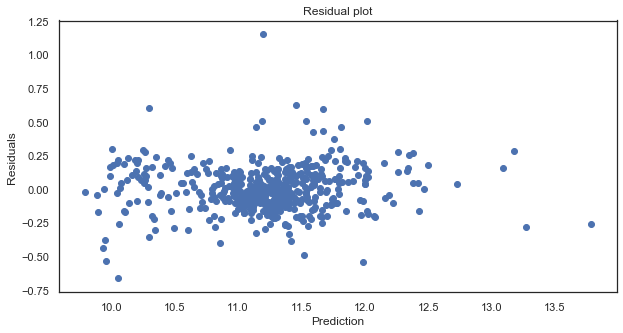

In [ ]:
# Defining Graph size
plt.figure(figsize=(10,5))

# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# Plot your predicted values on the x-axis, and your residuals on the y-axis on Residue Plot
plt.scatter(df_categorized_car_brands['PREDICTIONS'], df_categorized_car_brands['RESIDUE'])
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")

## Section 6.2: QQ Plot

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'Normal Q-Q plot')

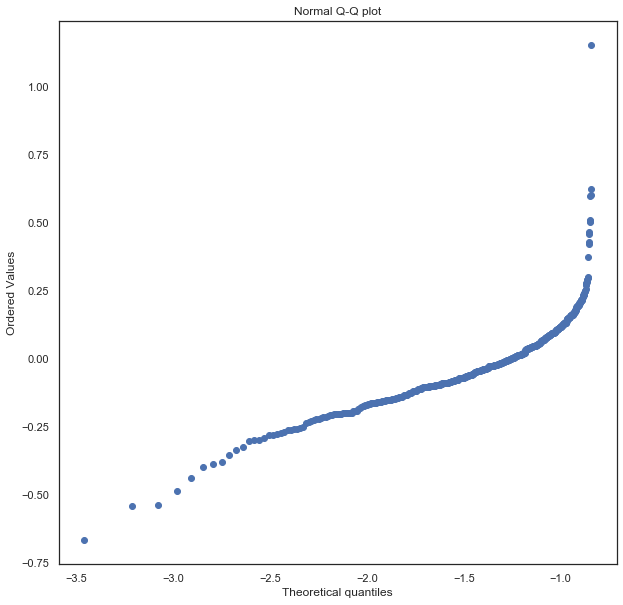

In [ ]:
# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# diagnose/inspect residual normality using QQplot:
plt.figure(figsize=(10,10))
stats.probplot(df_categorized_car_brands['RESIDUE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")